In [86]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
import unicodedata
import re
nltk.download('all')

[nltk_data] Error loading all: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>


False

In [87]:
data_path = "/Users/neo/Documents/bert/bert_final2.csv"
bert_data = pd.read_csv(data_path)
bert_data = bert_data.dropna()
bert_data = bert_data.reset_index().drop(['index'], axis = 1)
bert_data

,Tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Joking,webPublicationDate,sectionName
0,The government is to release a leaked Brexit a...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2018-01-31,Politics
1,Twenty-two school children on their way to sta...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2018-01-31,World news
2,Ireland’s deputy prime minister has warned it ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2018-01-31,Politics
3,The former prime minister Kevin Rudd is suing ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2018-01-31,Australia news
4,"The Labor leader, Bill Shorten, on Tuesday sen...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2018-01-31,Business
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37933,Top story: ‘They want to raze it to the ground...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,2022-03-23,World news
37934,A Russian couple who staged a solitary protest...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2022-03-23,UK news
37935,All big experiences in our lives have two real...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-03-23,Opinion
37936,"Until the Russian invasion of Ukraine, Hungary...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2022-03-23,World news


In [98]:
bert_data['webPublicationDate']=pd.to_datetime(bert_data['webPublicationDate'])
bert_data['year_quarter'] = bert_data['webPublicationDate'].dt.year.astype(str) + '-Q' + bert_data['webPublicationDate'].dt.quarter.astype(str)
bert_data

,Tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Joking,webPublicationDate,sectionName,n_emotions,year_quarter
0,The government is to release a leaked Brexit a...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2018-01-31,Politics,1,2018-Q1
1,Twenty-two school children on their way to sta...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2018-01-31,World news,1,2018-Q1
2,Ireland’s deputy prime minister has warned it ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2018-01-31,Politics,1,2018-Q1
3,The former prime minister Kevin Rudd is suing ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2018-01-31,Australia news,1,2018-Q1
4,"The Labor leader, Bill Shorten, on Tuesday sen...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2018-01-31,Business,2,2018-Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37933,Top story: ‘They want to raze it to the ground...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,2022-03-23,World news,4,2022-Q1
37934,A Russian couple who staged a solitary protest...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2022-03-23,UK news,1,2022-Q1
37935,All big experiences in our lives have two real...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-03-23,Opinion,1,2022-Q1
37936,"Until the Russian invasion of Ukraine, Hungary...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2022-03-23,World news,1,2022-Q1


In [88]:
data_path = "/Users/neo/Documents/bert/roberta_final1.0.csv"
roberta_data = pd.read_csv(data_path)
roberta_data = roberta_data.dropna()
roberta_data = roberta_data.reset_index().drop(['index'], axis = 1)
roberta_data

,bodyContent,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Joking,sectionName,webPublicationDate,year_quarter
0,The government is to release a leaked Brexit a...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Politics,2018-01-31,2018-Q1
1,Twenty-two school children on their way to sta...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,World news,2018-01-31,2018-Q1
2,Ireland’s deputy prime minister has warned it ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Politics,2018-01-31,2018-Q1
3,The former prime minister Kevin Rudd is suing ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Australia news,2018-01-31,2018-Q1
4,"The Labor leader, Bill Shorten, on Tuesday sen...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,Business,2018-01-31,2018-Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37933,Top story: ‘They want to raze it to the ground...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,World news,2022-03-23,2022-Q1
37934,A Russian couple who staged a solitary protest...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,UK news,2022-03-23,2022-Q1
37935,All big experiences in our lives have two real...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Opinion,2022-03-23,2022-Q1
37936,"Until the Russian invasion of Ukraine, Hungary...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,World news,2022-03-23,2022-Q1


In [89]:
bert_data['n_emotions'] = bert_data['Optimistic'] + bert_data['Thankful'] + bert_data['Empathetic'] + bert_data['Pessimistic'] + bert_data['Anxious'] + bert_data['Sad'] + bert_data['Annoyed'] + bert_data['Denial'] + bert_data['Official report'] + bert_data['Joking']
bert_data['n_emotions'] = bert_data['n_emotions'].astype(int)

In [90]:
roberta_data['n_emotions'] = roberta_data['Optimistic'] + roberta_data['Thankful'] + roberta_data['Empathetic'] + roberta_data['Pessimistic'] + roberta_data['Anxious'] + roberta_data['Sad'] + roberta_data['Annoyed'] + roberta_data['Denial'] + roberta_data['Official report'] + roberta_data['Joking']
roberta_data['n_emotions'] = roberta_data['n_emotions'].astype(int)

In [91]:
roberta_data['n_emotions'].value_counts()

n_emotions
1    22475
2    13099
3     1585
0      766
4       13
Name: count, dtype: int64

In [92]:
bert_data['n_emotions'].value_counts()

n_emotions
1    17518
2    16045
3     3780
0      373
4      220
5        2
Name: count, dtype: int64

In [18]:
bert_data['webPublicationDate'] = pd.to_datetime(bert_data['webPublicationDate'])

pre_covid_bert_data = bert_data[(bert_data['webPublicationDate'] >= '2016-1-31') & (bert_data['webPublicationDate'] <= '2019-12-31')]
during_covid_bert_data = bert_data[(bert_data['webPublicationDate'] >= '2020-01-01') & (bert_data['webPublicationDate'] <= '2022-01-01')]
pre_covid_bert_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17193 entries, 0 to 17192
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Tweet               17193 non-null  object        
 1   Optimistic          17193 non-null  float64       
 2   Thankful            17193 non-null  float64       
 3   Empathetic          17193 non-null  float64       
 4   Pessimistic         17193 non-null  float64       
 5   Anxious             17193 non-null  float64       
 6   Sad                 17193 non-null  float64       
 7   Annoyed             17193 non-null  float64       
 8   Denial              17193 non-null  float64       
 9   Official report     17193 non-null  float64       
 10  Joking              17193 non-null  float64       
 11  webPublicationDate  17193 non-null  datetime64[ns]
 12  sectionName         17193 non-null  object        
 13  n_emotions          17193 non-null  int64         


In [19]:
during_covid_bert_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18369 entries, 17193 to 35561
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Tweet               18369 non-null  object        
 1   Optimistic          18369 non-null  float64       
 2   Thankful            18369 non-null  float64       
 3   Empathetic          18369 non-null  float64       
 4   Pessimistic         18369 non-null  float64       
 5   Anxious             18369 non-null  float64       
 6   Sad                 18369 non-null  float64       
 7   Annoyed             18369 non-null  float64       
 8   Denial              18369 non-null  float64       
 9   Official report     18369 non-null  float64       
 10  Joking              18369 non-null  float64       
 11  webPublicationDate  18369 non-null  datetime64[ns]
 12  sectionName         18369 non-null  object        
 13  n_emotions          18369 non-null  int64      

In [20]:
bert_data["sectionName"].value_counts()

sectionName
World news        11255
Opinion            7776
Australia news     5401
Business           4670
Politics           4585
UK news            4251
Name: count, dtype: int64

In [21]:
pre_covid_bert_data["sectionName"].value_counts()

sectionName
World news        4078
Opinion           4044
Politics          2689
Australia news    2226
UK news           2149
Business          2007
Name: count, dtype: int64

In [22]:
during_covid_bert_data["sectionName"].value_counts()

sectionName
World news        6400
Opinion           3351
Australia news    2736
Business          2383
UK news           1819
Politics          1680
Name: count, dtype: int64

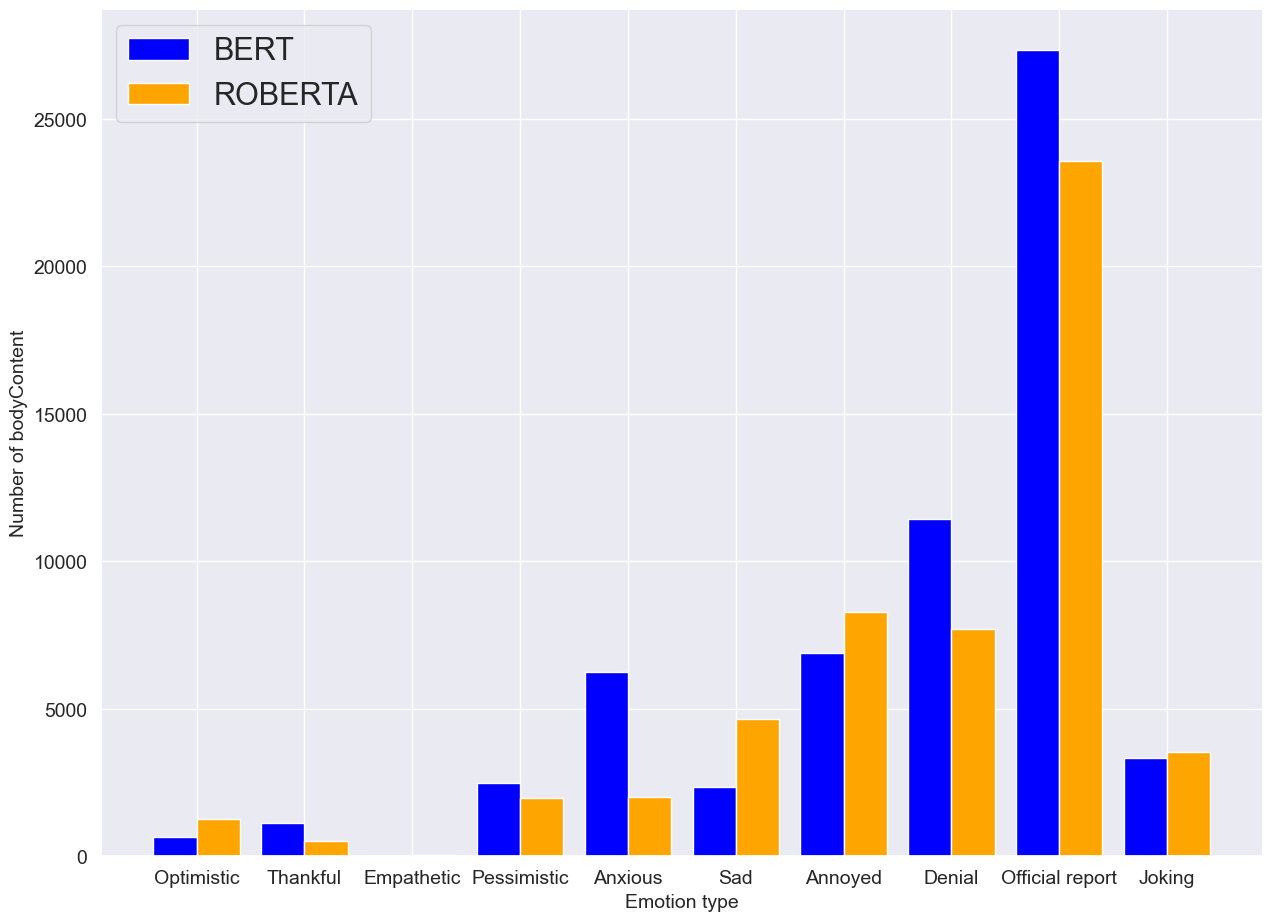

In [104]:
bert_sent_values = bert_data.iloc[:, 1:11].sum().values.astype(int)
roberta_sent_values = roberta_data.iloc[:, 1:11].sum().values.astype(int)
emotions = list(bert_data.columns[1:11])

x = np.arange(10)
y1 = bert_sent_values
y2 = roberta_sent_values
width = 0.4

plt.figure(figsize = (15, 11))
plt.bar(x-0.2, y1, width, color = 'blue')
plt.bar(x+0.2, y2, width, color = 'orange')
plt.xticks(x, emotions, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Emotion type", fontsize = 14)
plt.ylabel("Number of bodyContent", fontsize = 14)
plt.legend(["BERT", "ROBERTA"])
plt.show()

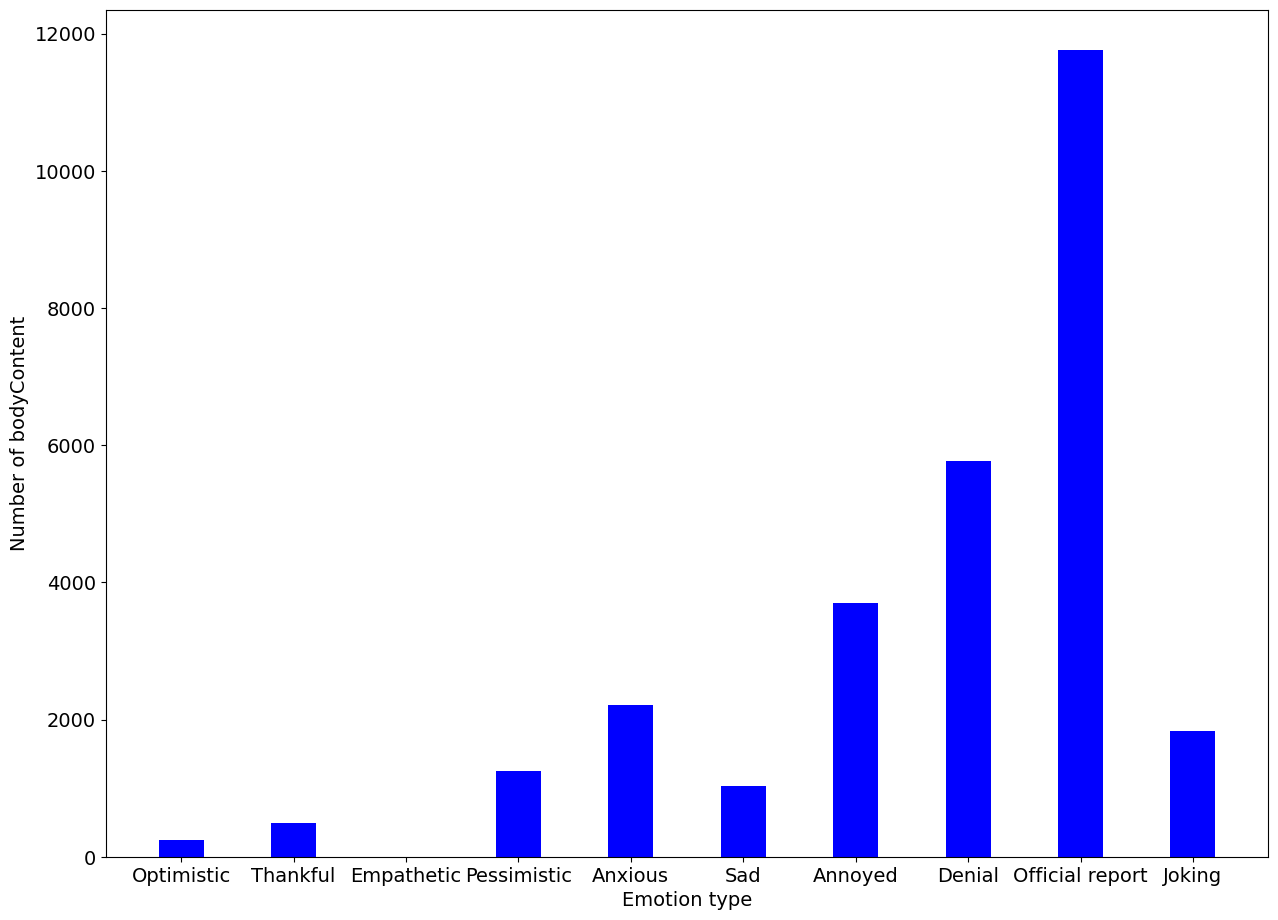

In [31]:
pre_covid_bert_sent_values = pre_covid_bert_data.iloc[:, 1:11].sum().values.astype(int)
emotions = list(pre_covid_bert_data.columns[1:11])

x = np.arange(10)
y1 = pre_covid_bert_sent_values
width = 0.4

plt.figure(figsize = (15, 11))
plt.bar(x, y1, width, color = 'blue')
plt.xticks(x, emotions, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Emotion type", fontsize = 14)
plt.ylabel("Number of bodyContent", fontsize = 14)
plt.show()

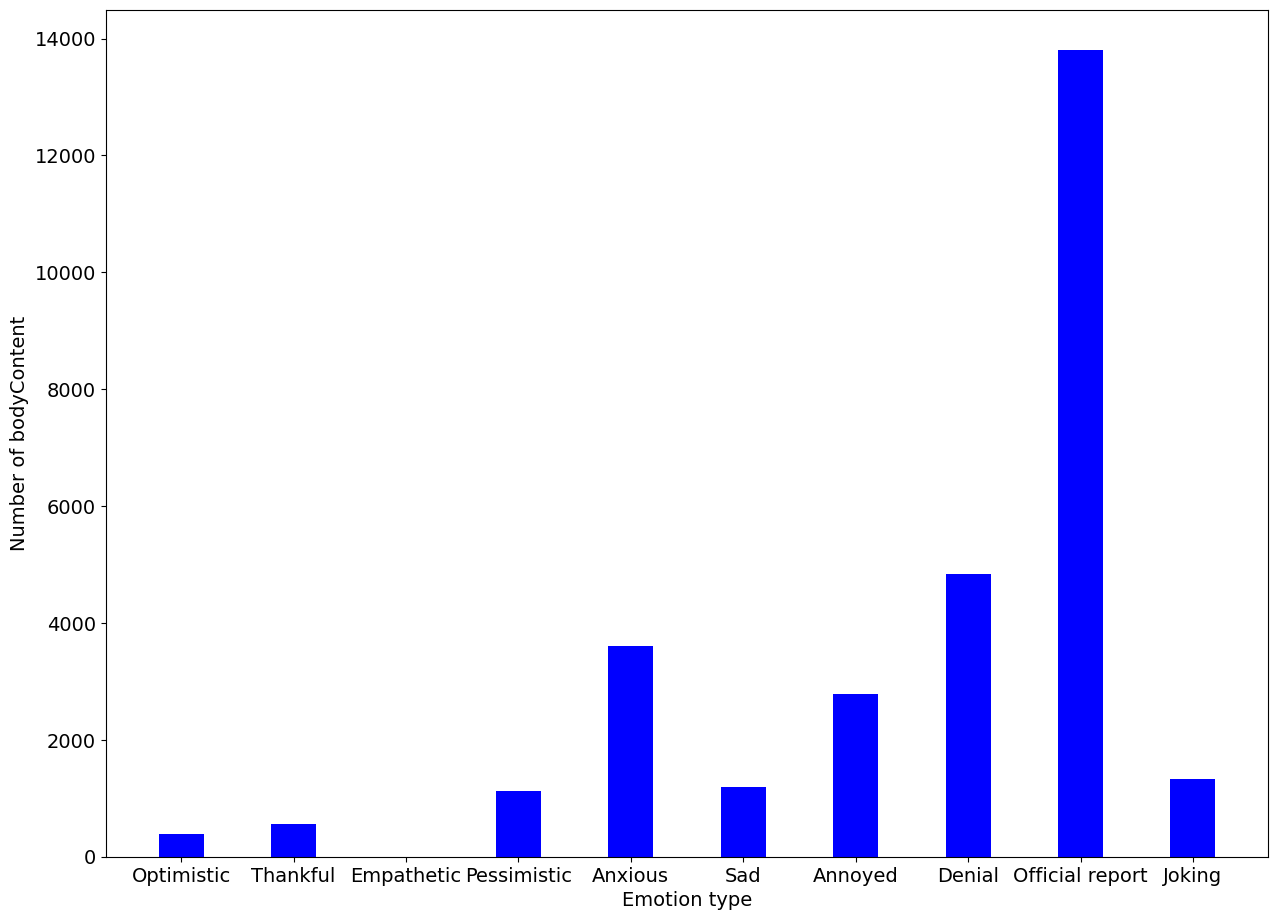

In [32]:
during_covid_bert_sent_values = during_covid_bert_data.iloc[:, 1:11].sum().values.astype(int)
emotions = list(during_covid_bert_data.columns[1:11])

x = np.arange(10)
y1 = during_covid_bert_sent_values
width = 0.4

plt.figure(figsize = (15, 11))
plt.bar(x, y1, width, color = 'blue')
plt.xticks(x, emotions, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Emotion type", fontsize = 14)
plt.ylabel("Number of bodyContent", fontsize = 14)
plt.show()

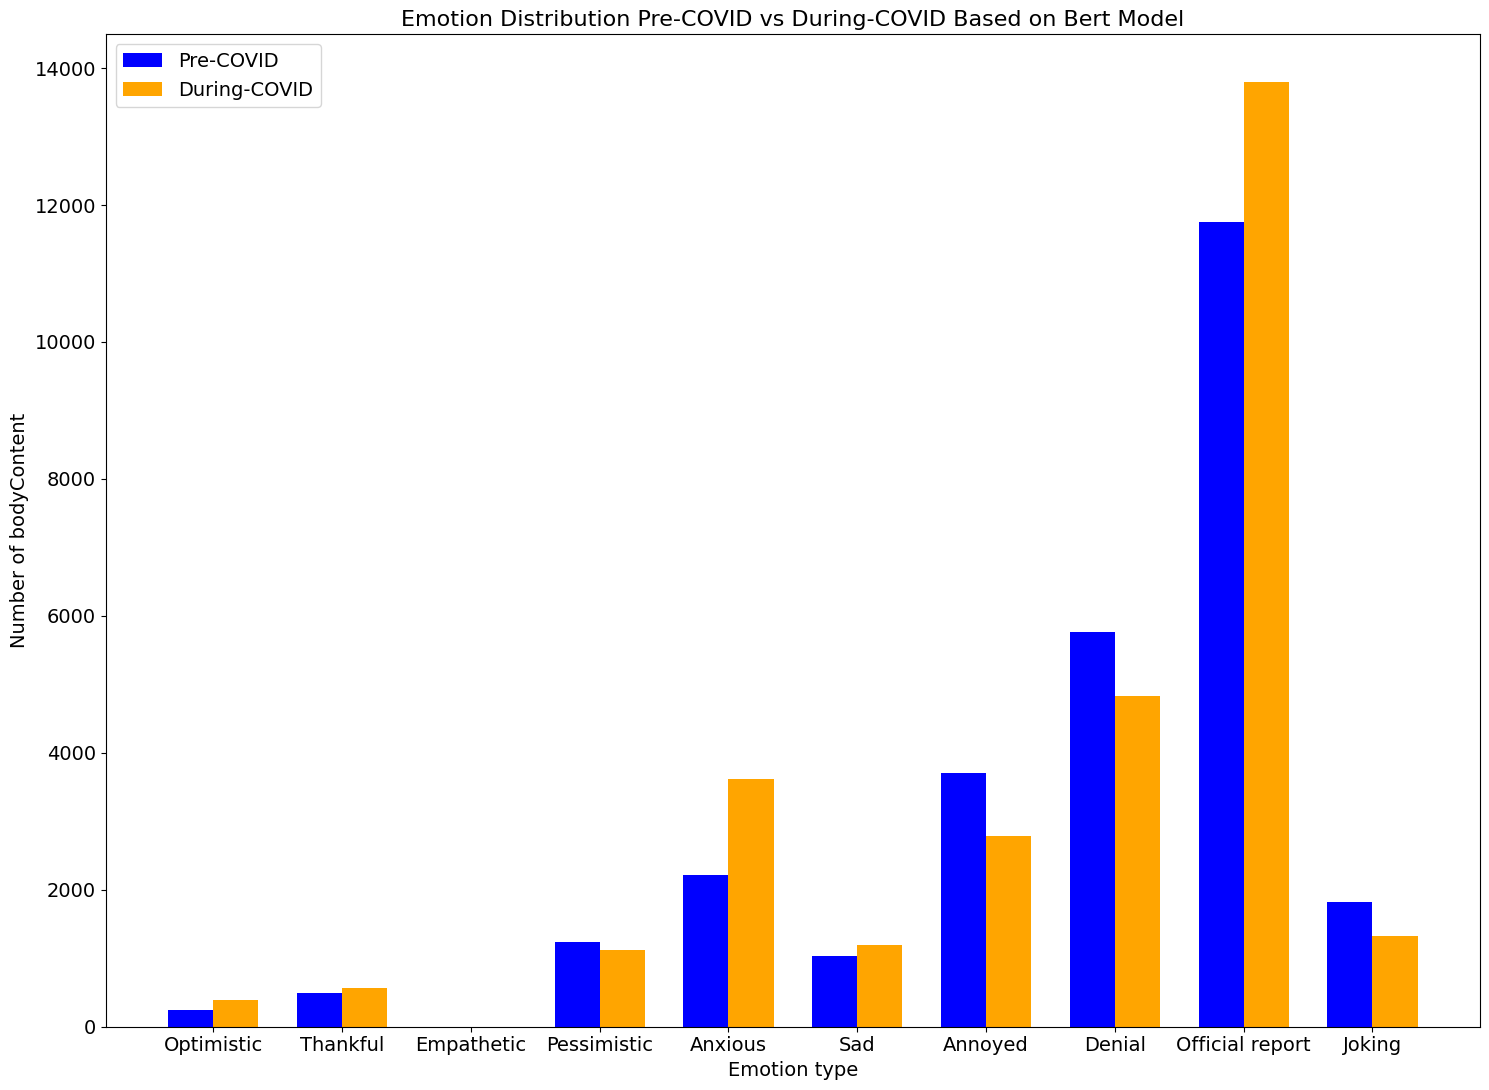

In [36]:
# 设置x轴的位置和每个条形图的宽度
x = np.arange(len(emotions))  # 假设两组数据的情绪种类数量相同
width = 0.35  # 条形图的宽度

# 创建一个图形和轴的实例
plt.figure(figsize=(15, 11))

# 绘制两组数据
plt.bar(x - width/2, pre_covid_bert_sent_values, width, label='Pre-COVID', color='blue')
plt.bar(x + width/2, during_covid_bert_sent_values, width, label='During-COVID', color='orange')

# 添加一些图形装饰
plt.xlabel('Emotion type', fontsize=14)
plt.ylabel('Number of bodyContent', fontsize=14)
plt.xticks(x, emotions, fontsize=14)  # 假设pre_covid和during_covid的情绪标签相同
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.title('Emotion Distribution Pre-COVID vs During-COVID Based on Bert Model', fontsize=16)
plt.tight_layout()  # 调整布局以确保所有标签和标题都能完整显示
plt.show()

In [34]:
aus_bert = bert_data[(bert_data['sectionName']=='Australia news')]
     

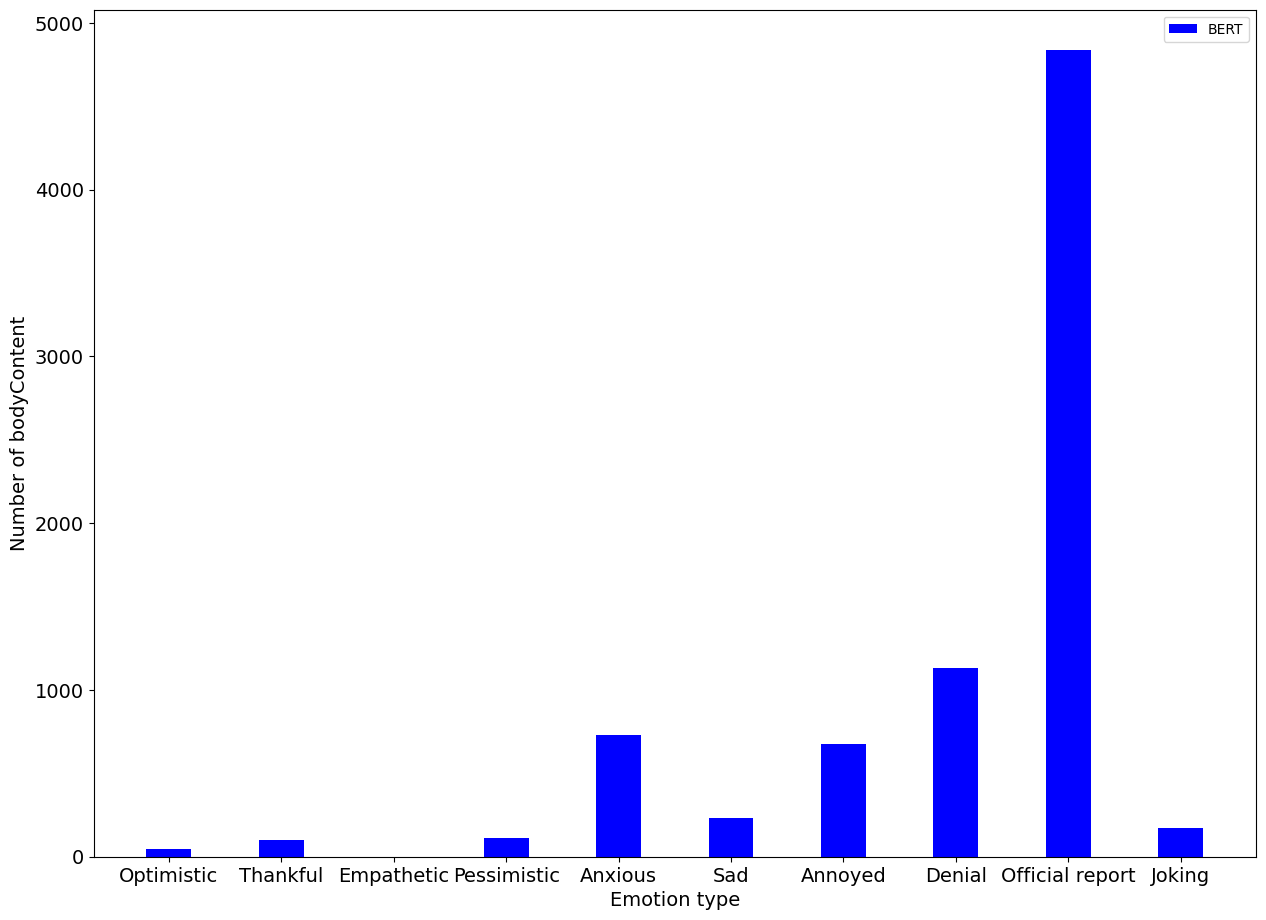

In [35]:
aus_bert_sent_values = aus_bert.iloc[:, 1:11].sum().values.astype(int)
emotions = list(aus_bert.columns[1:11])
x = np.arange(10)
y = aus_bert_sent_values
width = 0.4

plt.figure(figsize = (15, 11))
plt.bar(x, y, width, color = 'blue')
plt.xticks(x, emotions, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Emotion type", fontsize = 14)
plt.ylabel("Number of bodyContent", fontsize = 14)
plt.legend(["BERT"])
plt.show()

In [40]:
uk_bert = bert_data[(bert_data['sectionName']=='UK news')]

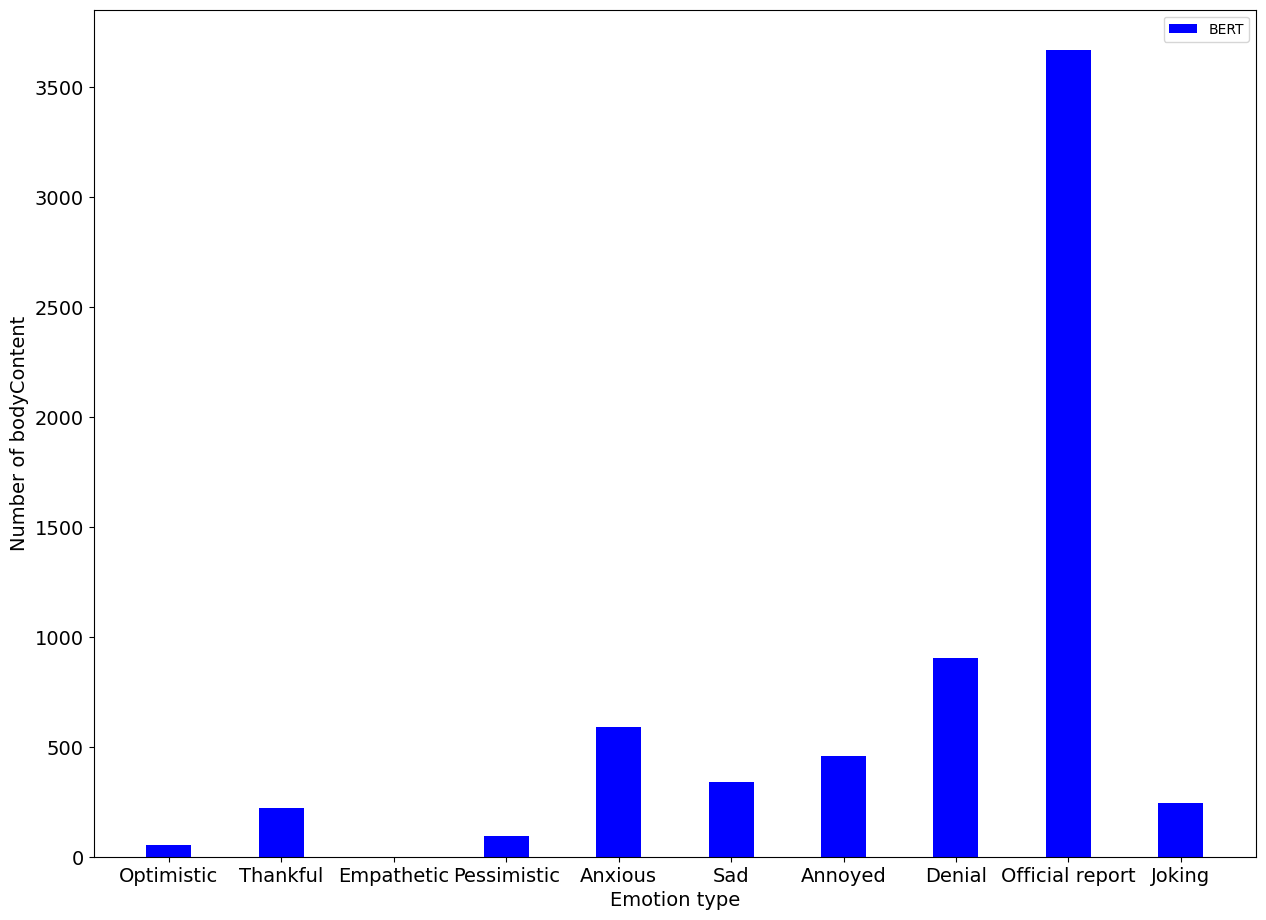

In [41]:
uk_bert_sent_values = uk_bert.iloc[:, 1:11].sum().values.astype(int)
emotions = list(uk_bert.columns[1:11])
x = np.arange(10)
y = uk_bert_sent_values
width = 0.4

plt.figure(figsize = (15, 11))
plt.bar(x, y, width, color = 'blue')
plt.xticks(x, emotions, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Emotion type", fontsize = 14)
plt.ylabel("Number of bodyContent", fontsize = 14)
plt.legend(["BERT"])
plt.show()

In [43]:
world_bert = bert_data[(bert_data['sectionName']=='World news')]
world_bert

,Tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Joking,webPublicationDate,sectionName,n_emotions
1,Twenty-two school children on their way to sta...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2018-01-31,World news,1
24,The soldiers came in the darkness to Majuma Be...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2018-01-31,World news,2
32,Anyone who thinks the business of cannabis cul...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2018-01-31,World news,1
35,A senior opposition leader in Kenya has said u...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2018-01-31,World news,2
46,"The prominent Swiss academic Tariq Ramadan, a ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2018-01-31,World news,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37928,Estonia is calling for Nato to abandon its “tr...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2022-03-23,World news,1
37932,A Foreign Office minister has flown to the Bri...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2022-03-23,World news,2
37933,Top story: ‘They want to raze it to the ground...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,2022-03-23,World news,4
37936,"Until the Russian invasion of Ukraine, Hungary...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2022-03-23,World news,1


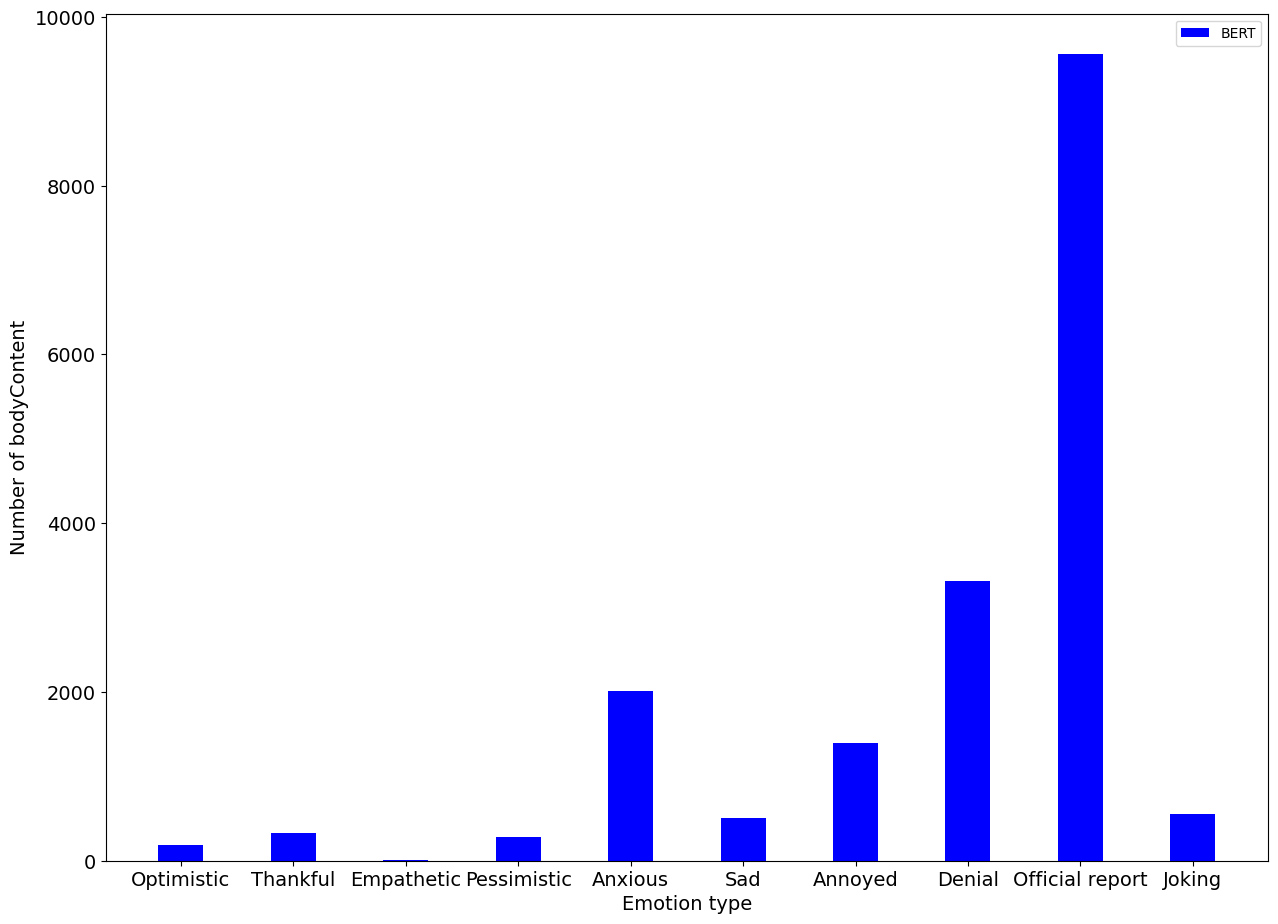

In [44]:
world_bert_sent_values = world_bert.iloc[:, 1:11].sum().values.astype(int)
emotions = list(world_bert.columns[1:11])
x = np.arange(10)
y = world_bert_sent_values
width = 0.4

plt.figure(figsize = (15, 11))
plt.bar(x, y, width, color = 'blue')
plt.xticks(x, emotions, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Emotion type", fontsize = 14)
plt.ylabel("Number of bodyContent", fontsize = 14)
plt.legend(["BERT"])
plt.show()

In [45]:
opinion_bert = bert_data[(bert_data['sectionName']=='Opinion')]
opinion_bert

,Tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Joking,webPublicationDate,sectionName,n_emotions
11,When former colleagues at the BBC asked me to ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2018-01-31,Opinion,1
18,When the chief executive of a business declare...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2018-01-31,Opinion,2
19,"We meet this evening, says Cassius to Brutus a...",0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2018-01-31,Opinion,3
20,Rituals are designed not merely to embody but ...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2018-01-31,Opinion,2
31,During the State of the Union speech on Tuesda...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2018-01-31,Opinion,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37915,"While all eyes were on another horror, our war...",0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-03-23,Opinion,2
37920,Is truth the first casualty of pandemics? Of a...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2022-03-23,Opinion,1
37927,Haven’t heard of BimboTok? Then it’s time to w...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2022-03-23,Opinion,1
37929,"When refugee crises occur, I think of my late ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-03-23,Opinion,0


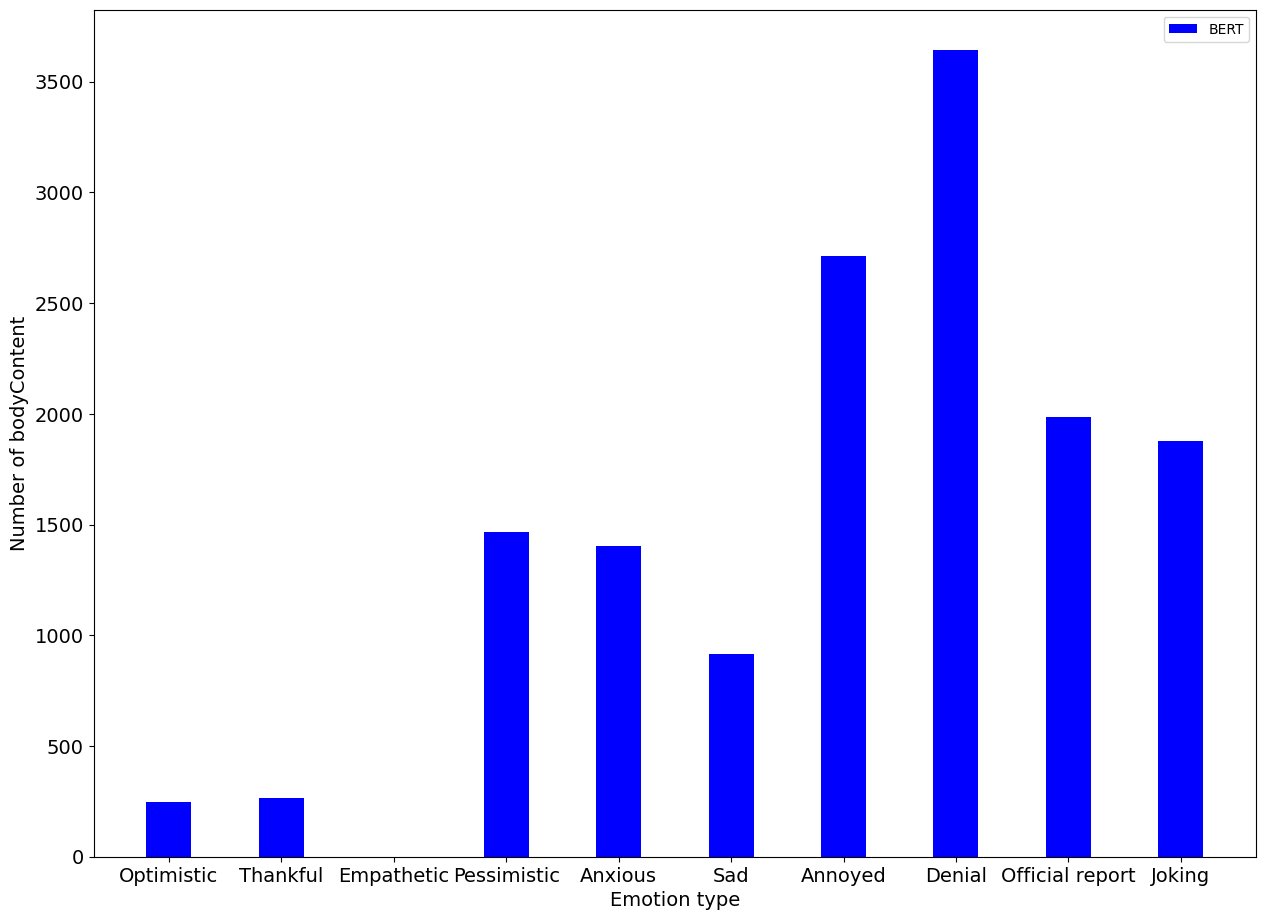

In [46]:
opinion_bert_sent_values = opinion_bert.iloc[:, 1:11].sum().values.astype(int)
emotions = list(opinion_bert.columns[1:11])
x = np.arange(10)
y = opinion_bert_sent_values
width = 0.4

plt.figure(figsize = (15, 11))
plt.bar(x, y, width, color = 'blue')
plt.xticks(x, emotions, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Emotion type", fontsize = 14)
plt.ylabel("Number of bodyContent", fontsize = 14)
plt.legend(["BERT"])
plt.show()

In [48]:
business_politic_bert = bert_data[(bert_data['sectionName']=='Business')|(bert_data['sectionName']=='Politics')]
business_politic_bert

,Tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Joking,webPublicationDate,sectionName,n_emotions
0,The government is to release a leaked Brexit a...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2018-01-31,Politics,1
2,Ireland’s deputy prime minister has warned it ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2018-01-31,Politics,1
4,"The Labor leader, Bill Shorten, on Tuesday sen...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2018-01-31,Business,2
5,Theresa May has sparked a new clash with Bruss...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2018-01-31,Politics,1
8,A government minister has resigned from his jo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2018-01-31,Politics,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37911,Boris Johnson has said it appears P&O Ferries ...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2022-03-23,Business,2
37913,Some food bank users are declining items such ...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2022-03-23,Business,2
37923,Rishi Sunak will give his spring statement on ...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2022-03-23,Business,2
37926,Britain’s cost of living squeeze intensified f...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2022-03-23,Business,1


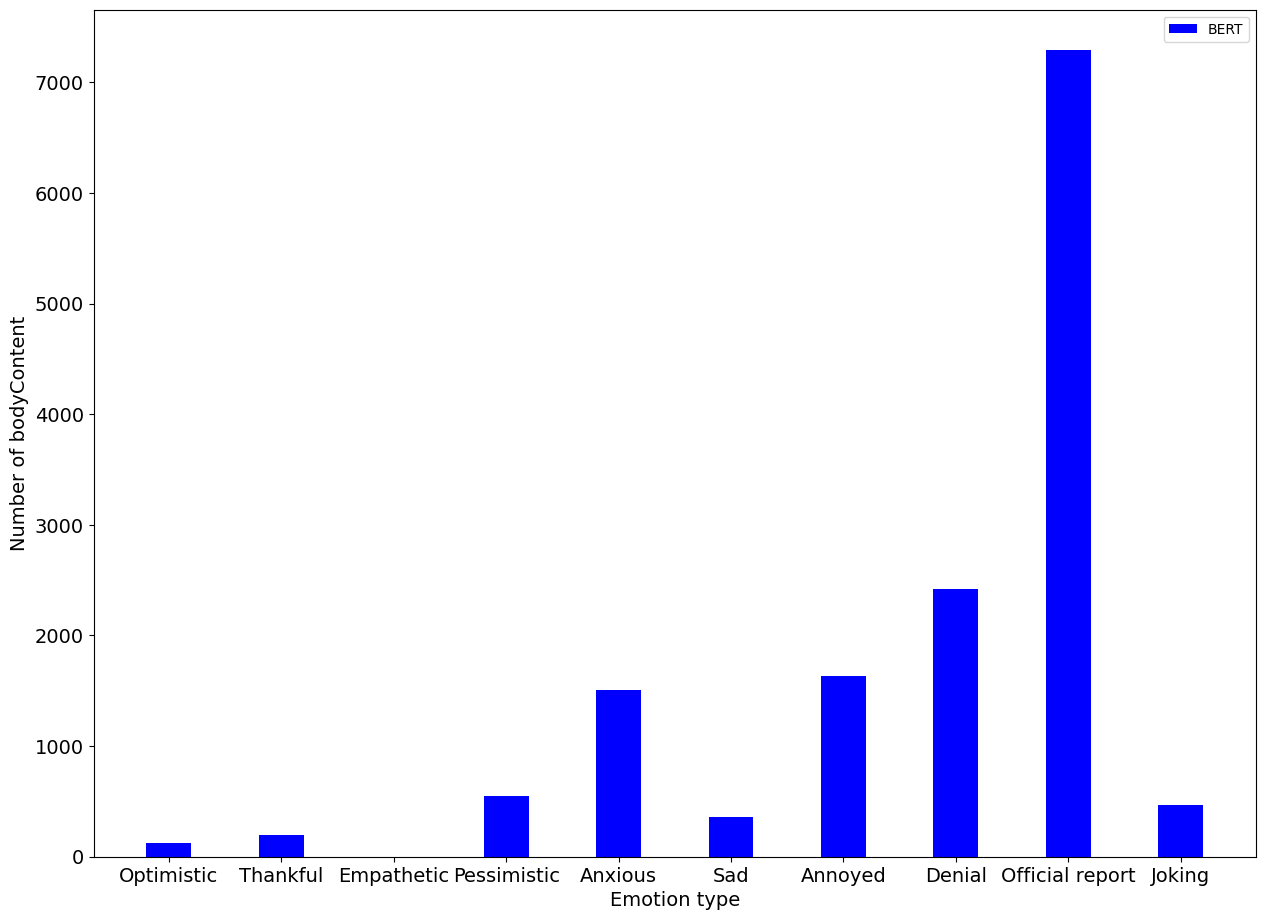

In [49]:
business_politic_bert_sent_values = business_politic_bert.iloc[:, 1:11].sum().values.astype(int)
emotions = list(business_politic_bert.columns[1:11])
x = np.arange(10)
y = business_politic_bert_sent_values
width = 0.4

plt.figure(figsize = (15, 11))
plt.bar(x, y, width, color = 'blue')
plt.xticks(x, emotions, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Emotion type", fontsize = 14)
plt.ylabel("Number of bodyContent", fontsize = 14)
plt.legend(["BERT"])
plt.show()

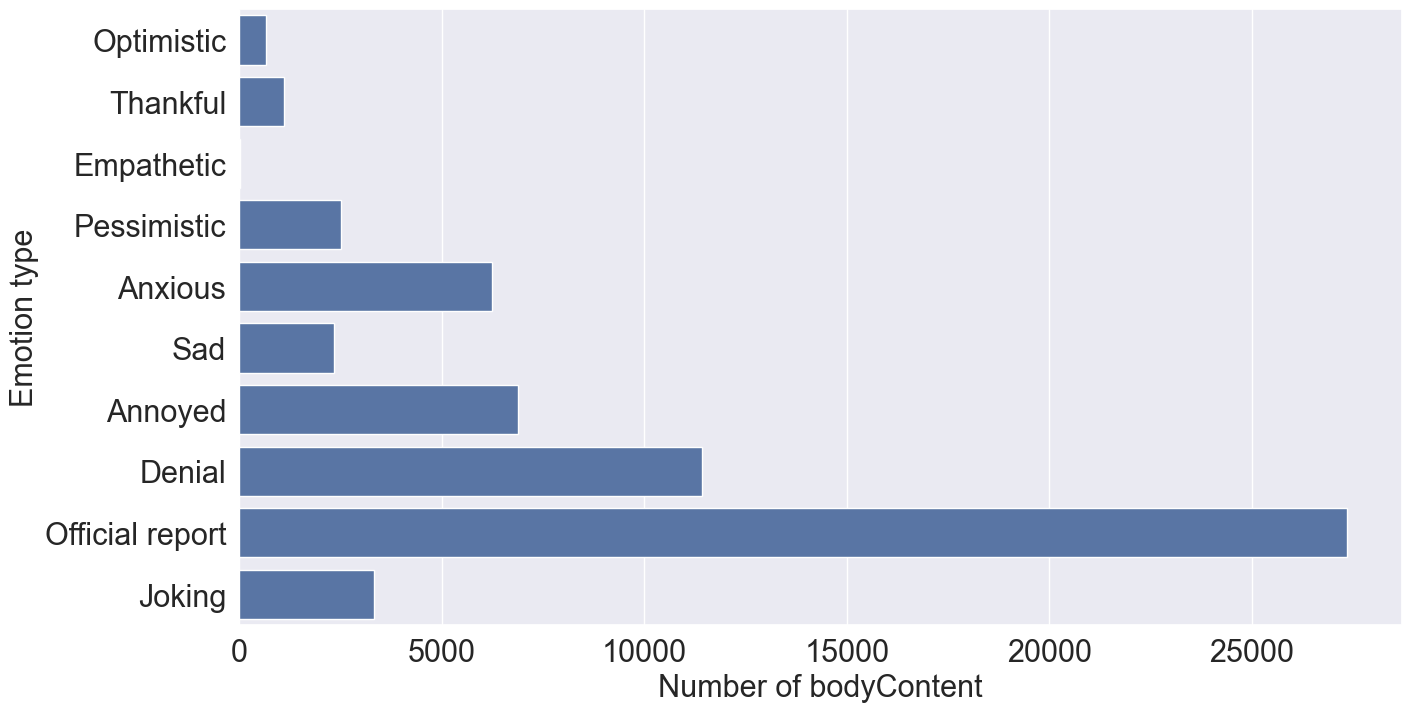

In [51]:
categories = list(bert_data.columns[1:11].values)
emotion_sums = bert_data.iloc[:, 1:11].sum().values

sns.set(font_scale=2)
plt.figure(figsize=(15, 8))
# 使用关键字参数传递数据
ax = sns.barplot(x=emotion_sums, y=categories, orient='h')
# 如果需要，取消注释以显示标题
# plt.title("Distribution of Emotions", fontsize=24)
plt.xlabel('Number of bodyContent', fontsize=22)
plt.ylabel('Emotion type', fontsize=22)
plt.show()

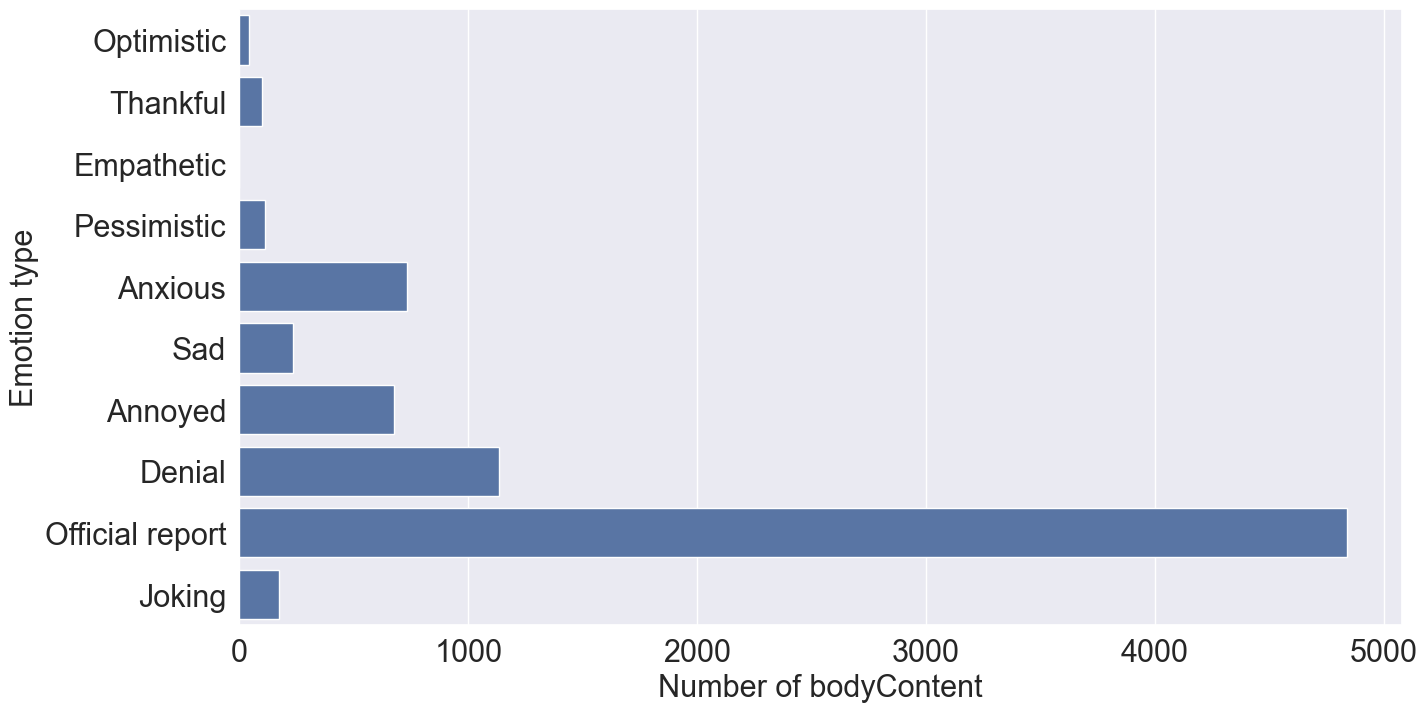

In [52]:
categories = list(aus_bert.columns[1:11].values)
emotion_sums = aus_bert.iloc[:, 1:11].sum().values

sns.set(font_scale=2)
plt.figure(figsize=(15, 8))
# 使用关键字参数传递数据
ax = sns.barplot(x=emotion_sums, y=categories, orient='h')
# 如果需要，取消注释以显示标题
# plt.title("Distribution of Emotions", fontsize=24)
plt.xlabel('Number of bodyContent', fontsize=22)
plt.ylabel('Emotion type', fontsize=22)

#adding the text labels
rects = ax.patches
labels = aus_bert.iloc[:, 1:11].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va = 'bottom', fontsize = 18)
plt.show()

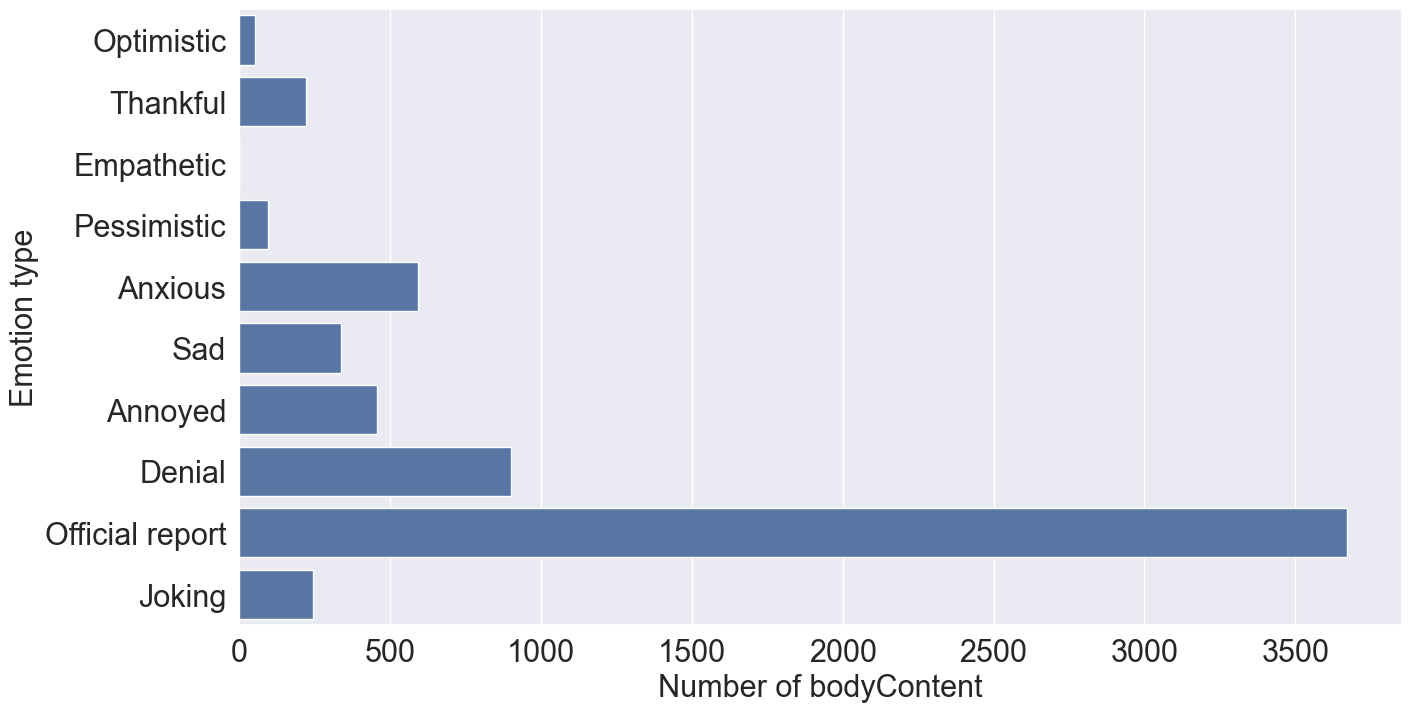

In [53]:
categories = list(uk_bert.columns[1:11].values)
emotion_sums = uk_bert.iloc[:, 1:11].sum().values

sns.set(font_scale=2)
plt.figure(figsize=(15, 8))
# 使用关键字参数传递数据
ax = sns.barplot(x=emotion_sums, y=categories, orient='h')
# 如果需要，取消注释以显示标题
# plt.title("Distribution of Emotions", fontsize=24)
plt.xlabel('Number of bodyContent', fontsize=22)
plt.ylabel('Emotion type', fontsize=22)

#adding the text labels
rects = ax.patches
labels = uk_bert.iloc[:, 1:11].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va = 'bottom', fontsize = 18)
plt.show()

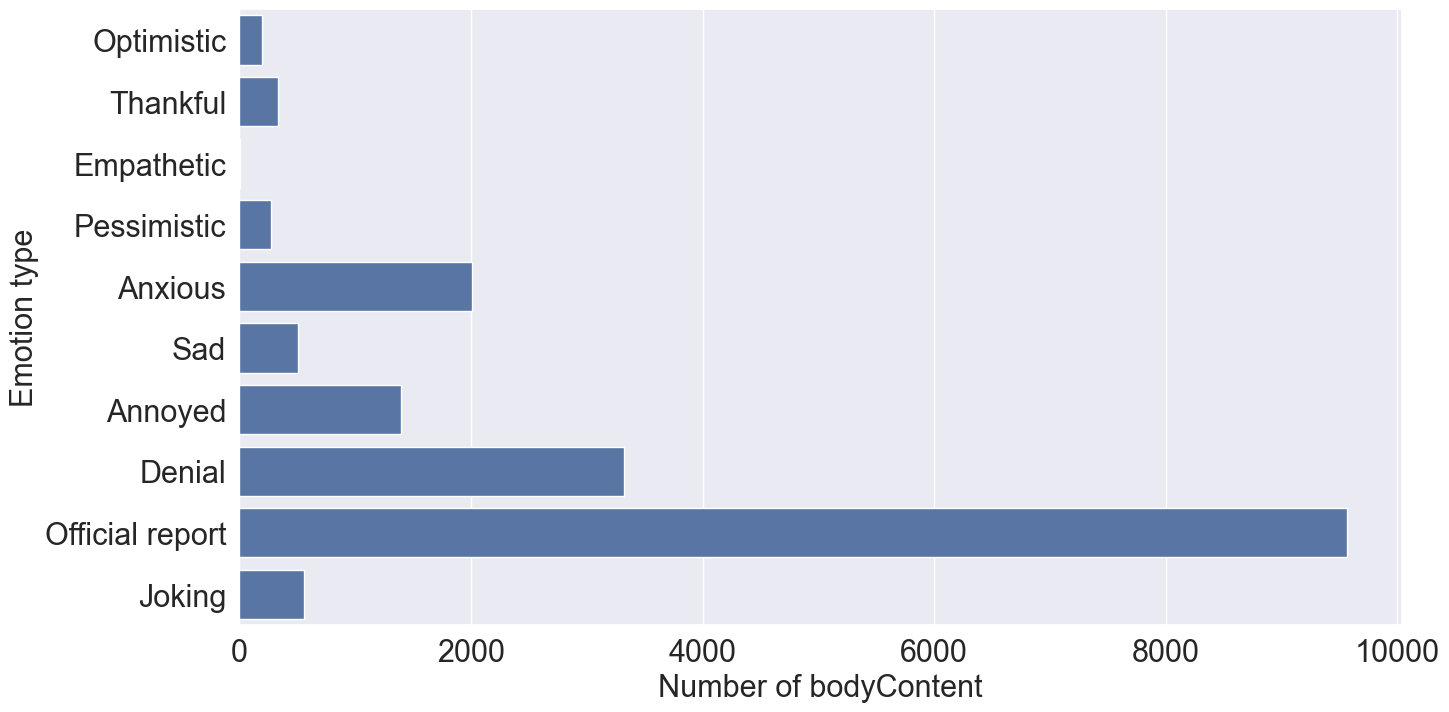

In [54]:
categories = list(world_bert.columns[1:11].values)
emotion_sums = world_bert.iloc[:, 1:11].sum().values

sns.set(font_scale=2)
plt.figure(figsize=(15, 8))
# 使用关键字参数传递数据
ax = sns.barplot(x=emotion_sums, y=categories, orient='h')
# 如果需要，取消注释以显示标题
# plt.title("Distribution of Emotions", fontsize=24)
plt.xlabel('Number of bodyContent', fontsize=22)
plt.ylabel('Emotion type', fontsize=22)

#adding the text labels
rects = ax.patches
labels = world_bert.iloc[:, 1:11].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va = 'bottom', fontsize = 18)
plt.show()

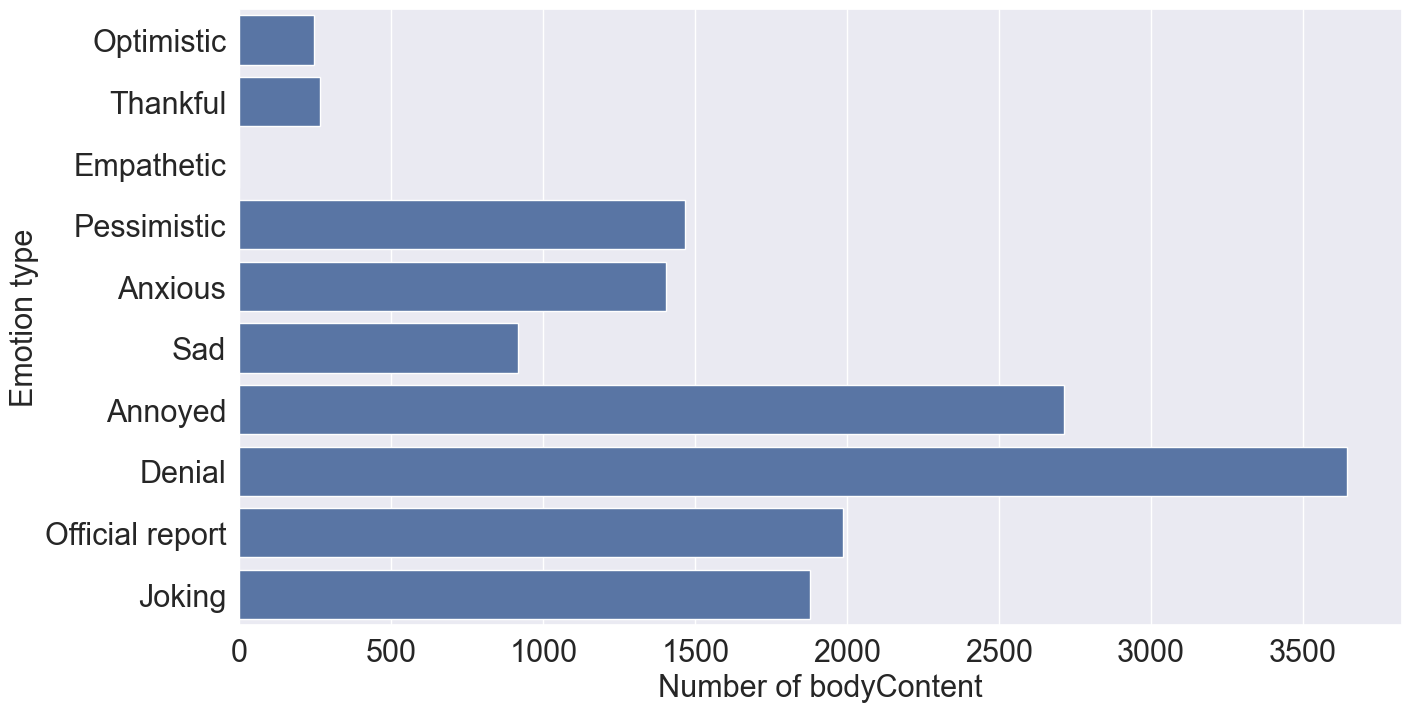

In [55]:
categories = list(opinion_bert.columns[1:11].values)
emotion_sums = opinion_bert.iloc[:, 1:11].sum().values

sns.set(font_scale=2)
plt.figure(figsize=(15, 8))
# 使用关键字参数传递数据
ax = sns.barplot(x=emotion_sums, y=categories, orient='h')
# 如果需要，取消注释以显示标题
# plt.title("Distribution of Emotions", fontsize=24)
plt.xlabel('Number of bodyContent', fontsize=22)
plt.ylabel('Emotion type', fontsize=22)

#adding the text labels
rects = ax.patches
labels = opinion_bert.iloc[:, 1:11].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va = 'bottom', fontsize = 18)
plt.show()

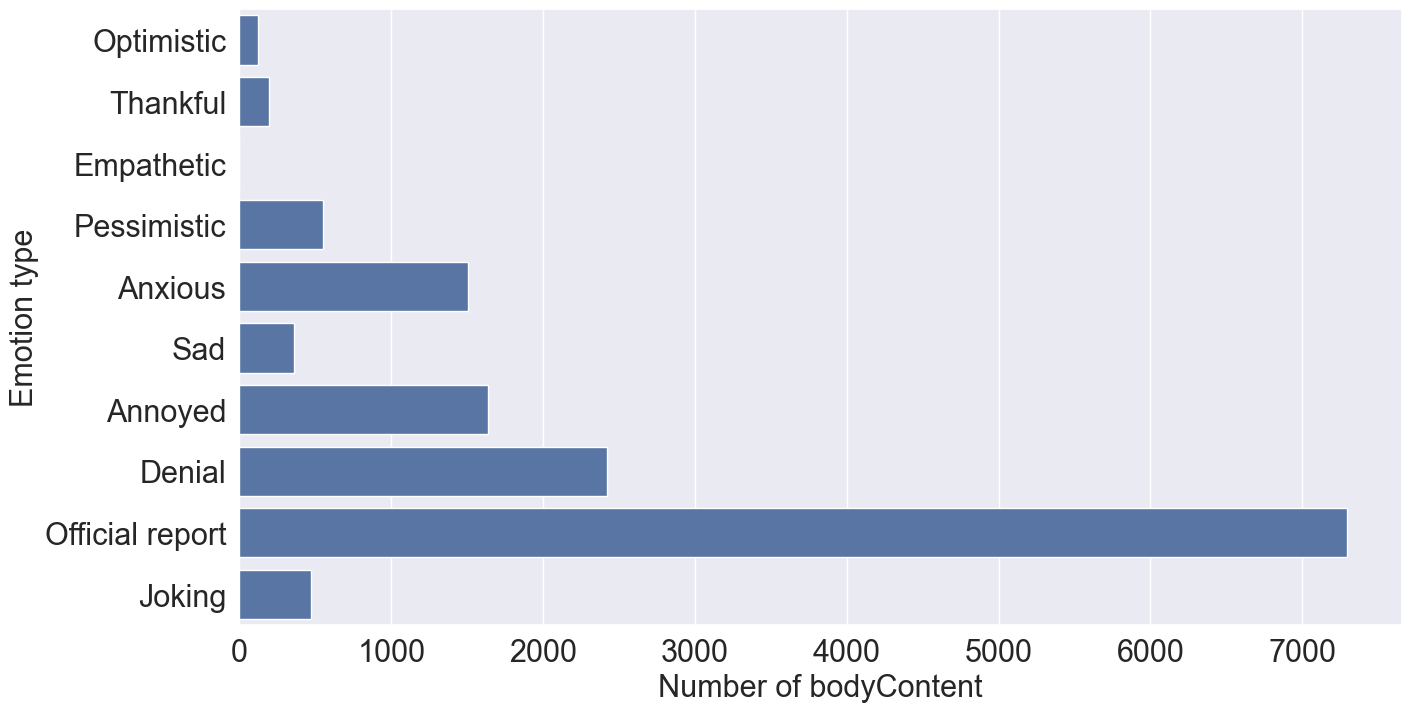

In [56]:
categories = list(business_politic_bert.columns[1:11].values)
emotion_sums = business_politic_bert.iloc[:, 1:11].sum().values

sns.set(font_scale=2)
plt.figure(figsize=(15, 8))
# 使用关键字参数传递数据
ax = sns.barplot(x=emotion_sums, y=categories, orient='h')
# 如果需要，取消注释以显示标题
# plt.title("Distribution of Emotions", fontsize=24)
plt.xlabel('Number of bodyContent', fontsize=22)
plt.ylabel('Emotion type', fontsize=22)

#adding the text labels
rects = ax.patches
labels = business_politic_bert.iloc[:, 1:11].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va = 'bottom', fontsize = 18)
plt.show()

In [62]:
emotions = list(bert_data.columns[1:11])
only_emotions = bert_data[emotions]
only_emotions

,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Joking
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
37933,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
37934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
37935,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
37936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
emotion_array = np.zeros((10, 10))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7, 'Official report' : 8,
    'Joking' : 9
}
for i in range(len(only_emotions)):
    l = only_emotions.iloc[i].tolist()
    for j in range(10):
        if l[j] == 1:
            emotion_array[j][j] += 1
        for k in range(j+1, 10):
            if (l[j] == 1) and (l[k] == 1):
                emotion_array[j][k] += int(1)
                emotion_array[k][j] += int(1)

emote_df = pd.DataFrame(emotion_array, columns = emotions)
for col in emote_df:
    emote_df[col] = emote_df[col].astype(int)

<Axes: >

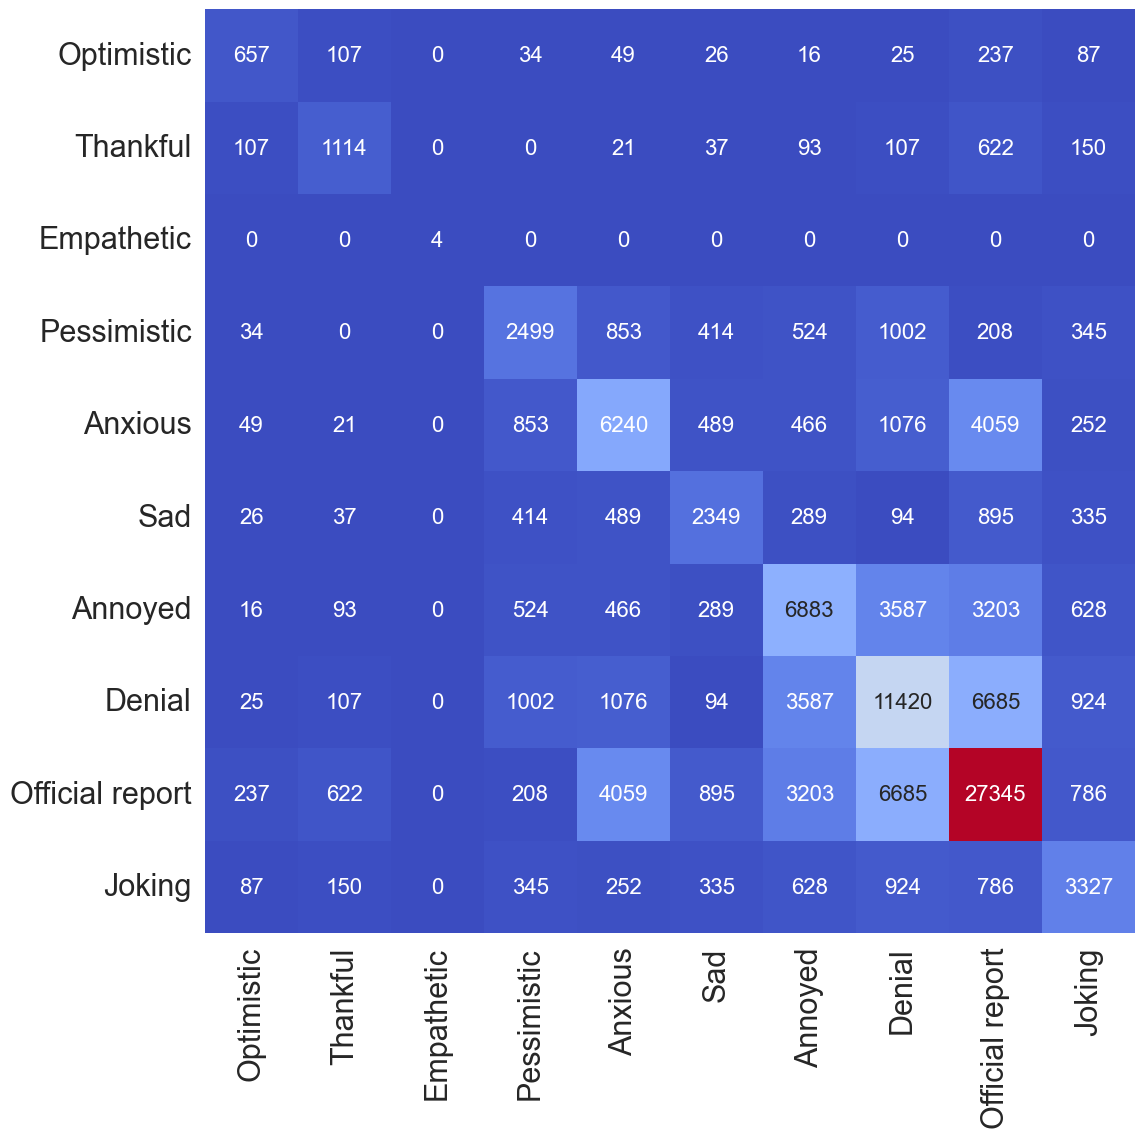

In [64]:
fig = plt.figure(figsize = (12, 12))
sns.set(font_scale = 2)
sns.heatmap(emote_df, annot = True, cmap = 'coolwarm', xticklabels = emote_df.columns, yticklabels = emote_df.columns, 
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

In [65]:
aus_emotions = list(aus_bert.columns[1:11])
only_emotions = aus_bert[emotions]

emotion_array = np.zeros((10, 10))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7, 'Official report' : 8,
    'Joking' : 9
}
for i in range(len(only_emotions)):
    l = only_emotions.iloc[i].tolist()
    for j in range(10):
        if l[j] == 1:
            emotion_array[j][j] += 1
        for k in range(j+1, 10):
            if (l[j] == 1) and (l[k] == 1):
                emotion_array[j][k] += int(1)
                emotion_array[k][j] += int(1)

emote_df = pd.DataFrame(emotion_array, columns = emotions)
for col in emote_df:
    emote_df[col] = emote_df[col].astype(int)

<Axes: >

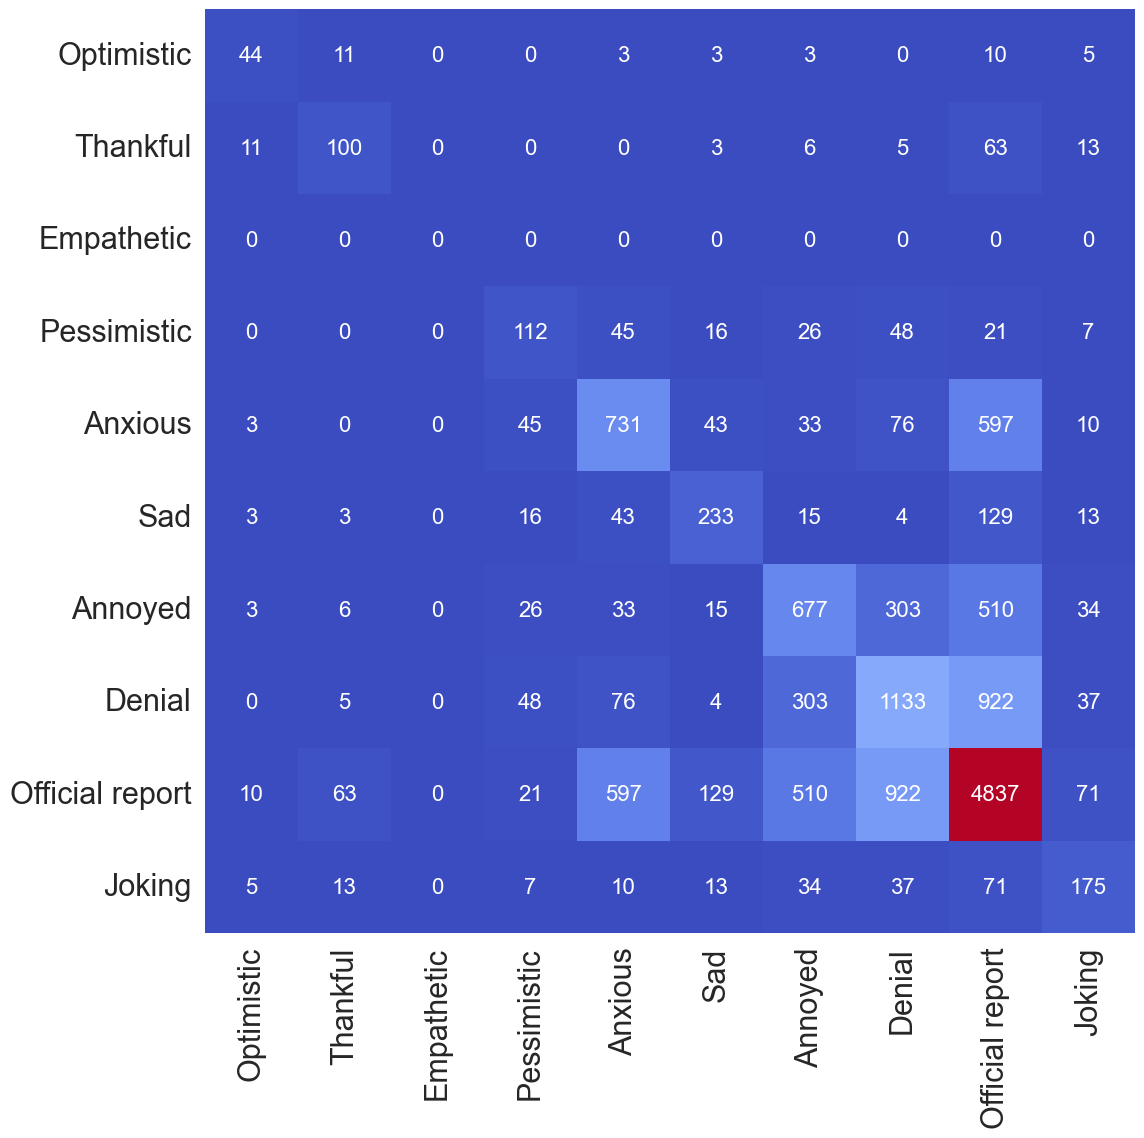

In [66]:
fig = plt.figure(figsize = (12, 12))
sns.set(font_scale = 2)
sns.heatmap(emote_df, annot = True, cmap = 'coolwarm', xticklabels = emote_df.columns, yticklabels = emote_df.columns, 
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

In [67]:
uk_emotions = list(uk_bert.columns[1:11])
only_emotions = uk_bert[emotions]

emotion_array = np.zeros((10, 10))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7, 'Official report' : 8,
    'Joking' : 9
}
for i in range(len(only_emotions)):
    l = only_emotions.iloc[i].tolist()
    for j in range(10):
        if l[j] == 1:
            emotion_array[j][j] += 1
        for k in range(j+1, 10):
            if (l[j] == 1) and (l[k] == 1):
                emotion_array[j][k] += int(1)
                emotion_array[k][j] += int(1)

emote_df = pd.DataFrame(emotion_array, columns = emotions)
for col in emote_df:
    emote_df[col] = emote_df[col].astype(int)

<Axes: >

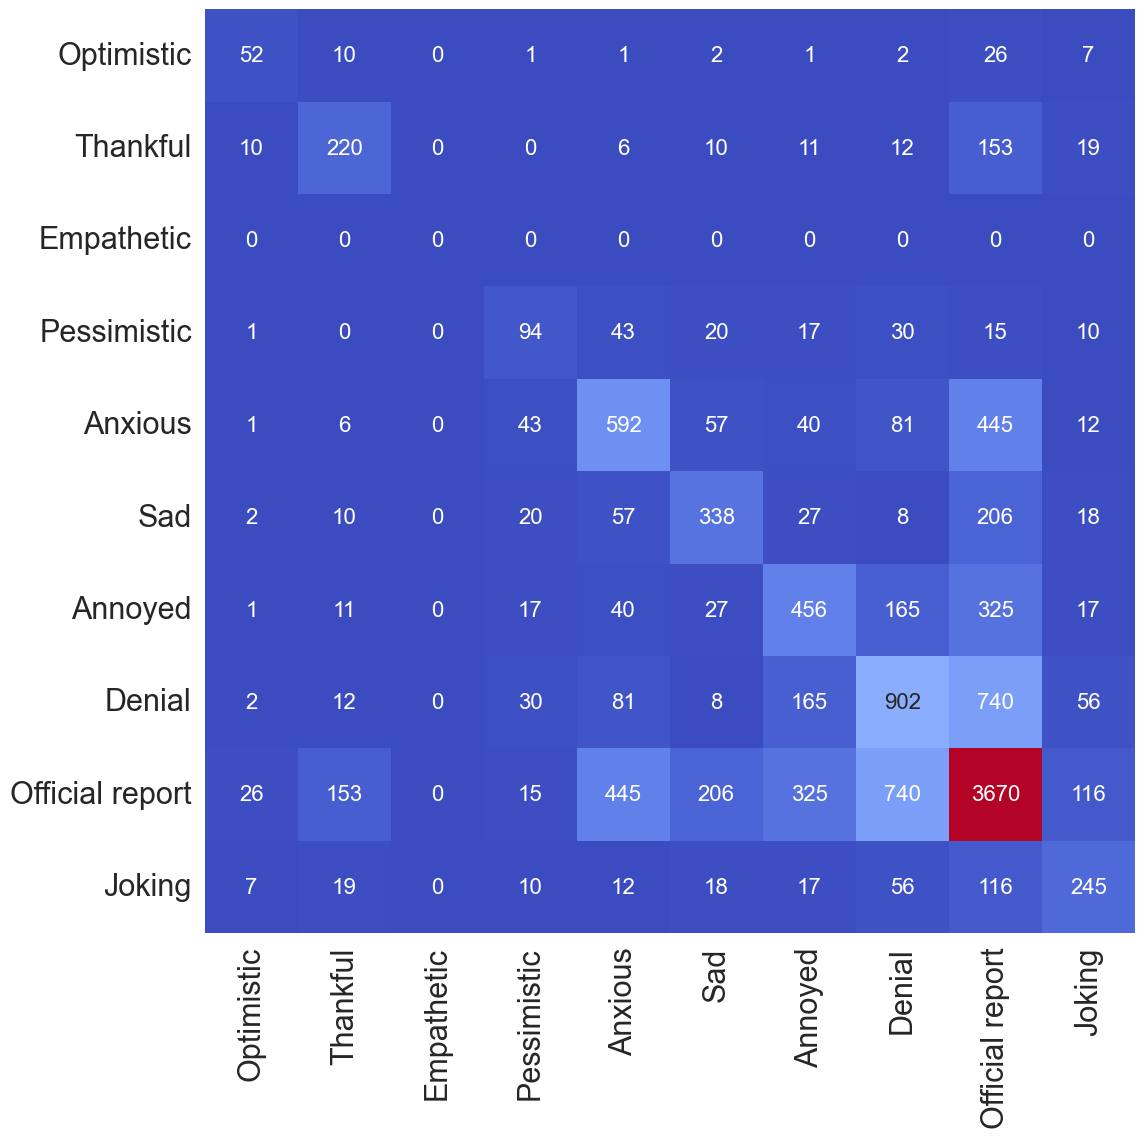

In [68]:
fig = plt.figure(figsize = (12, 12))
sns.set(font_scale = 2)
sns.heatmap(emote_df, annot = True, cmap = 'coolwarm', xticklabels = emote_df.columns, yticklabels = emote_df.columns, 
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

In [69]:
world_emotions = list(world_bert.columns[1:11])
only_emotions = world_bert[emotions]

emotion_array = np.zeros((10, 10))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7, 'Official report' : 8,
    'Joking' : 9
}
for i in range(len(only_emotions)):
    l = only_emotions.iloc[i].tolist()
    for j in range(10):
        if l[j] == 1:
            emotion_array[j][j] += 1
        for k in range(j+1, 10):
            if (l[j] == 1) and (l[k] == 1):
                emotion_array[j][k] += int(1)
                emotion_array[k][j] += int(1)

emote_df = pd.DataFrame(emotion_array, columns = emotions)
for col in emote_df:
    emote_df[col] = emote_df[col].astype(int)

<Axes: >

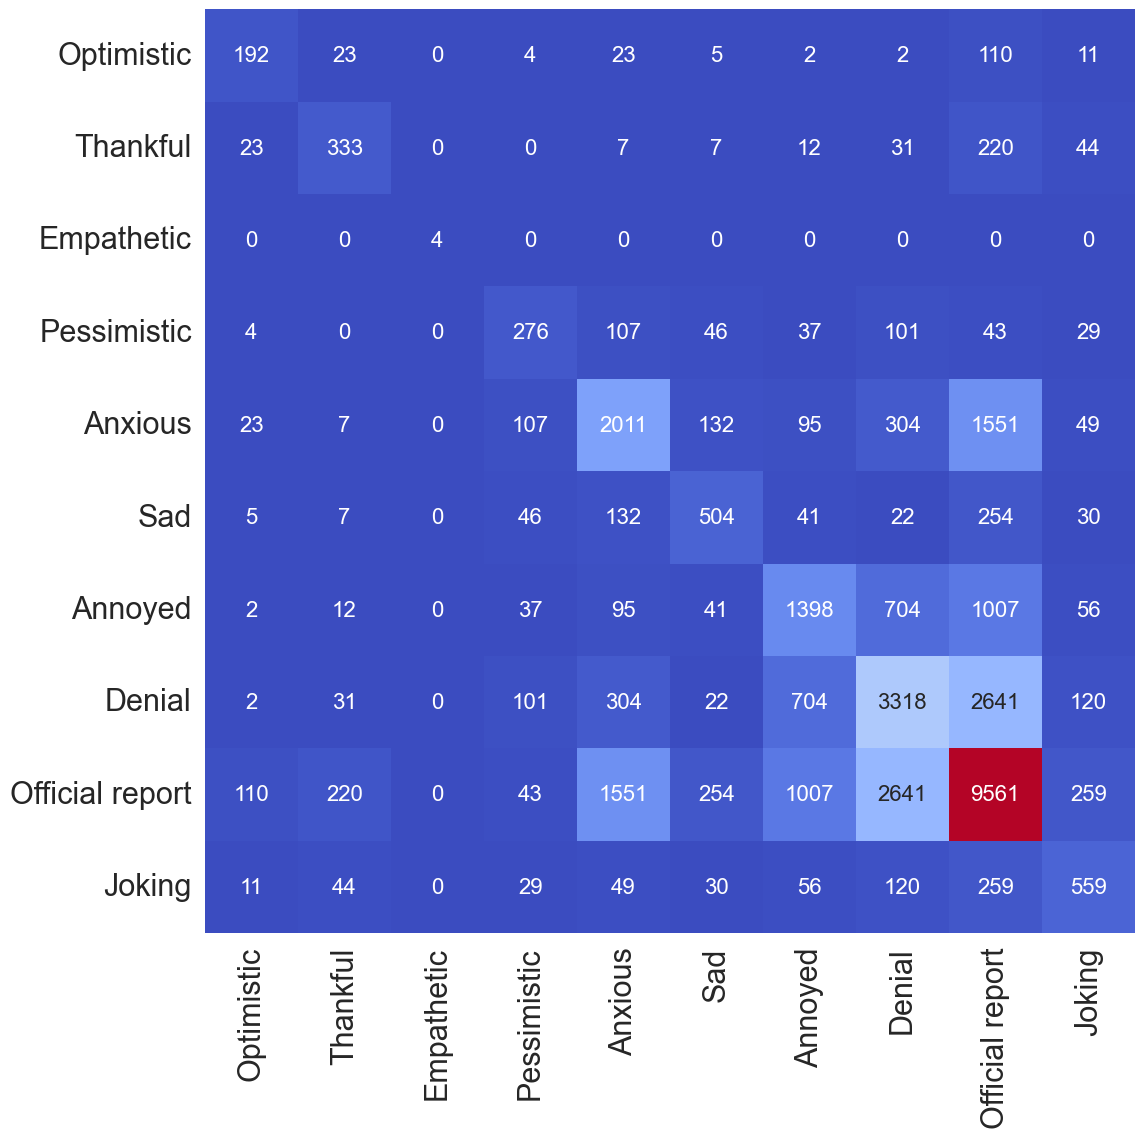

In [70]:
fig = plt.figure(figsize = (12, 12))
sns.set(font_scale = 2)
sns.heatmap(emote_df, annot = True, cmap = 'coolwarm', xticklabels = emote_df.columns, yticklabels = emote_df.columns, 
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

In [71]:
opinion_emotions = list(opinion_bert.columns[1:11])
only_emotions = opinion_bert[emotions]

emotion_array = np.zeros((10, 10))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7, 'Official report' : 8,
    'Joking' : 9
}
for i in range(len(only_emotions)):
    l = only_emotions.iloc[i].tolist()
    for j in range(10):
        if l[j] == 1:
            emotion_array[j][j] += 1
        for k in range(j+1, 10):
            if (l[j] == 1) and (l[k] == 1):
                emotion_array[j][k] += int(1)
                emotion_array[k][j] += int(1)

emote_df = pd.DataFrame(emotion_array, columns = emotions)
for col in emote_df:
    emote_df[col] = emote_df[col].astype(int)

<Axes: >

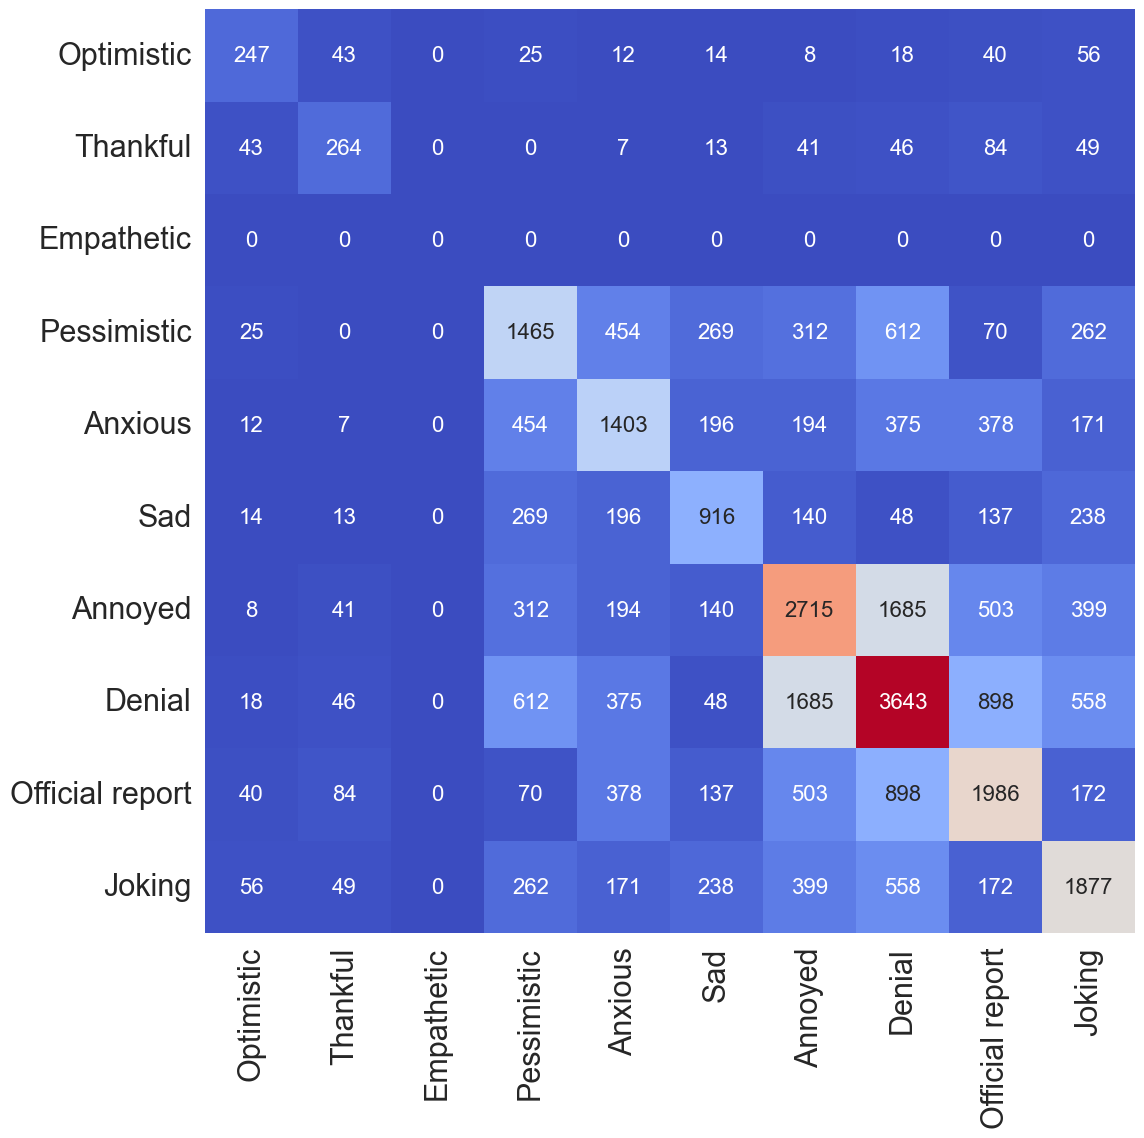

In [72]:
fig = plt.figure(figsize = (12, 12))
sns.set(font_scale = 2)
sns.heatmap(emote_df, annot = True, cmap = 'coolwarm', xticklabels = emote_df.columns, yticklabels = emote_df.columns, 
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

In [73]:
business_politic_emotions = list(business_politic_bert.columns[1:11])
only_emotions = business_politic_bert[emotions]

emotion_array = np.zeros((10, 10))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7, 'Official report' : 8,
    'Joking' : 9
}
for i in range(len(only_emotions)):
    l = only_emotions.iloc[i].tolist()
    for j in range(10):
        if l[j] == 1:
            emotion_array[j][j] += 1
        for k in range(j+1, 10):
            if (l[j] == 1) and (l[k] == 1):
                emotion_array[j][k] += int(1)
                emotion_array[k][j] += int(1)

emote_df = pd.DataFrame(emotion_array, columns = emotions)
for col in emote_df:
    emote_df[col] = emote_df[col].astype(int)

<Axes: >

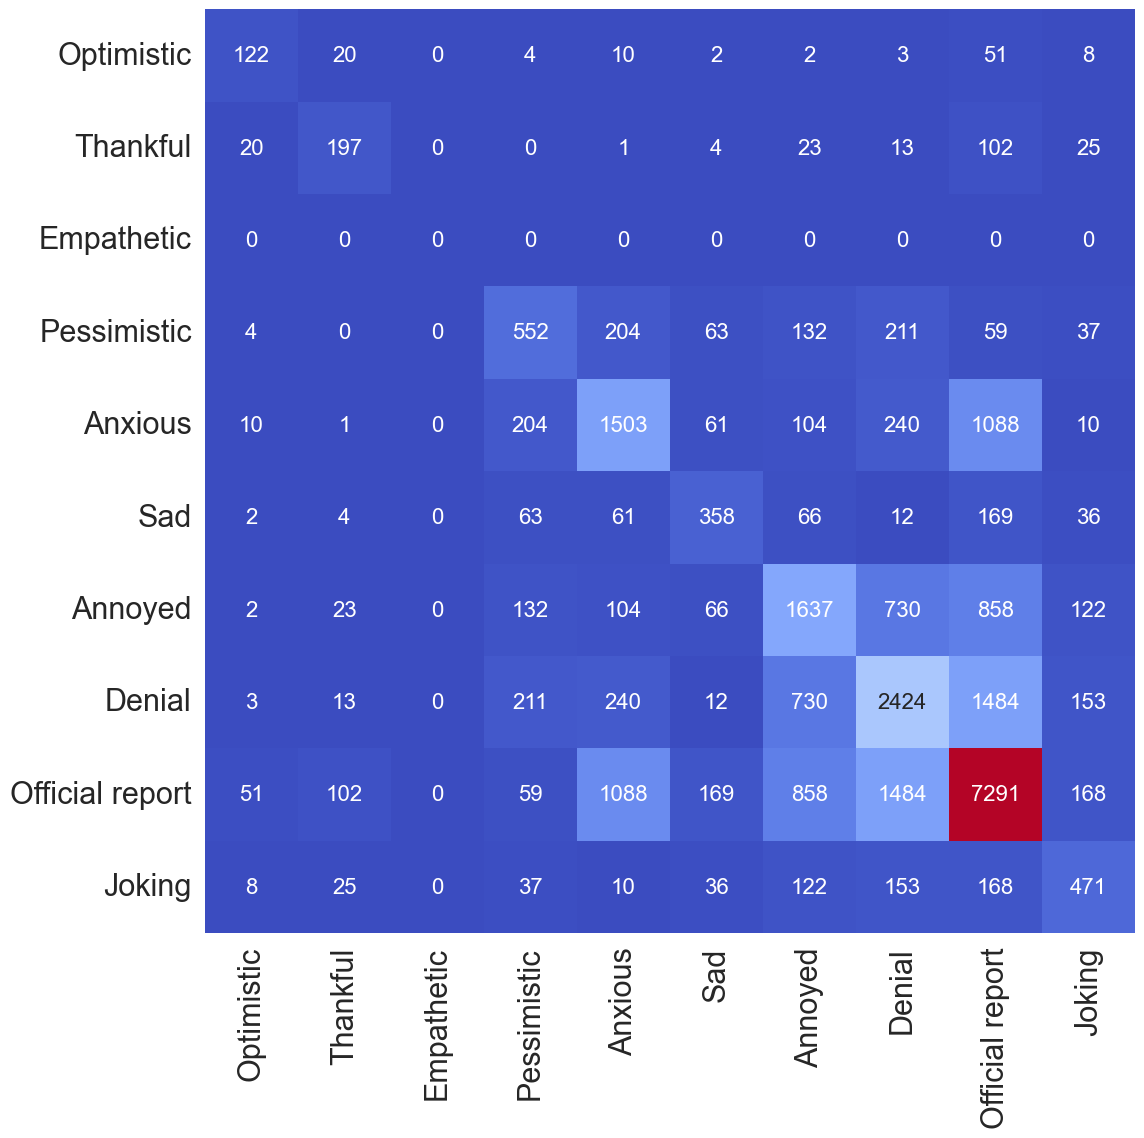

In [74]:
fig = plt.figure(figsize = (12, 12))
sns.set(font_scale = 2)
sns.heatmap(emote_df, annot = True, cmap = 'coolwarm', xticklabels = emote_df.columns, yticklabels = emote_df.columns, 
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

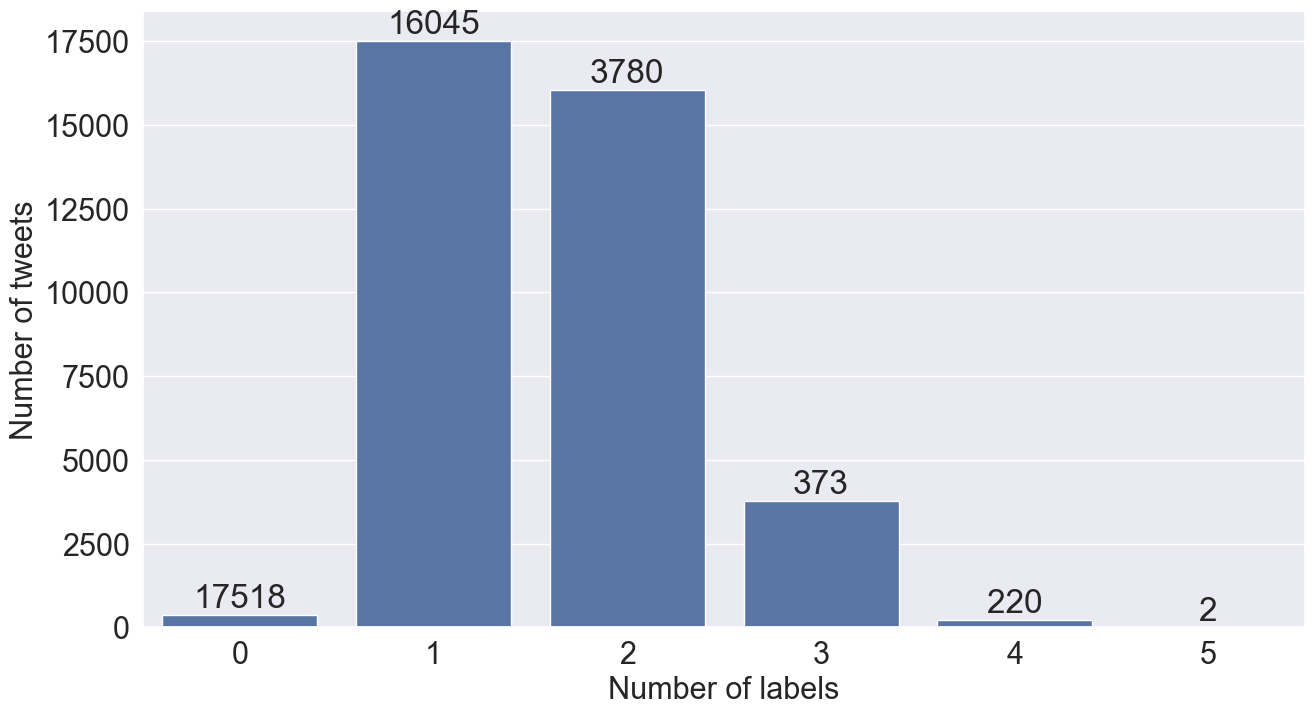

In [77]:

rowSums = bert_data['n_emotions'].astype(int)
multiLabel_counts = rowSums.value_counts()

sns.set(font_scale = 2)
plt.figure(figsize = (15, 8))

ax = sns.barplot(x=multiLabel_counts.index, y=multiLabel_counts.values, orient = 'v')

#plt.title("Tweets having multiple labels")
plt.ylabel('Number of tweets', fontsize = 22)
plt.xlabel('Number of labels', fontsize = 22)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

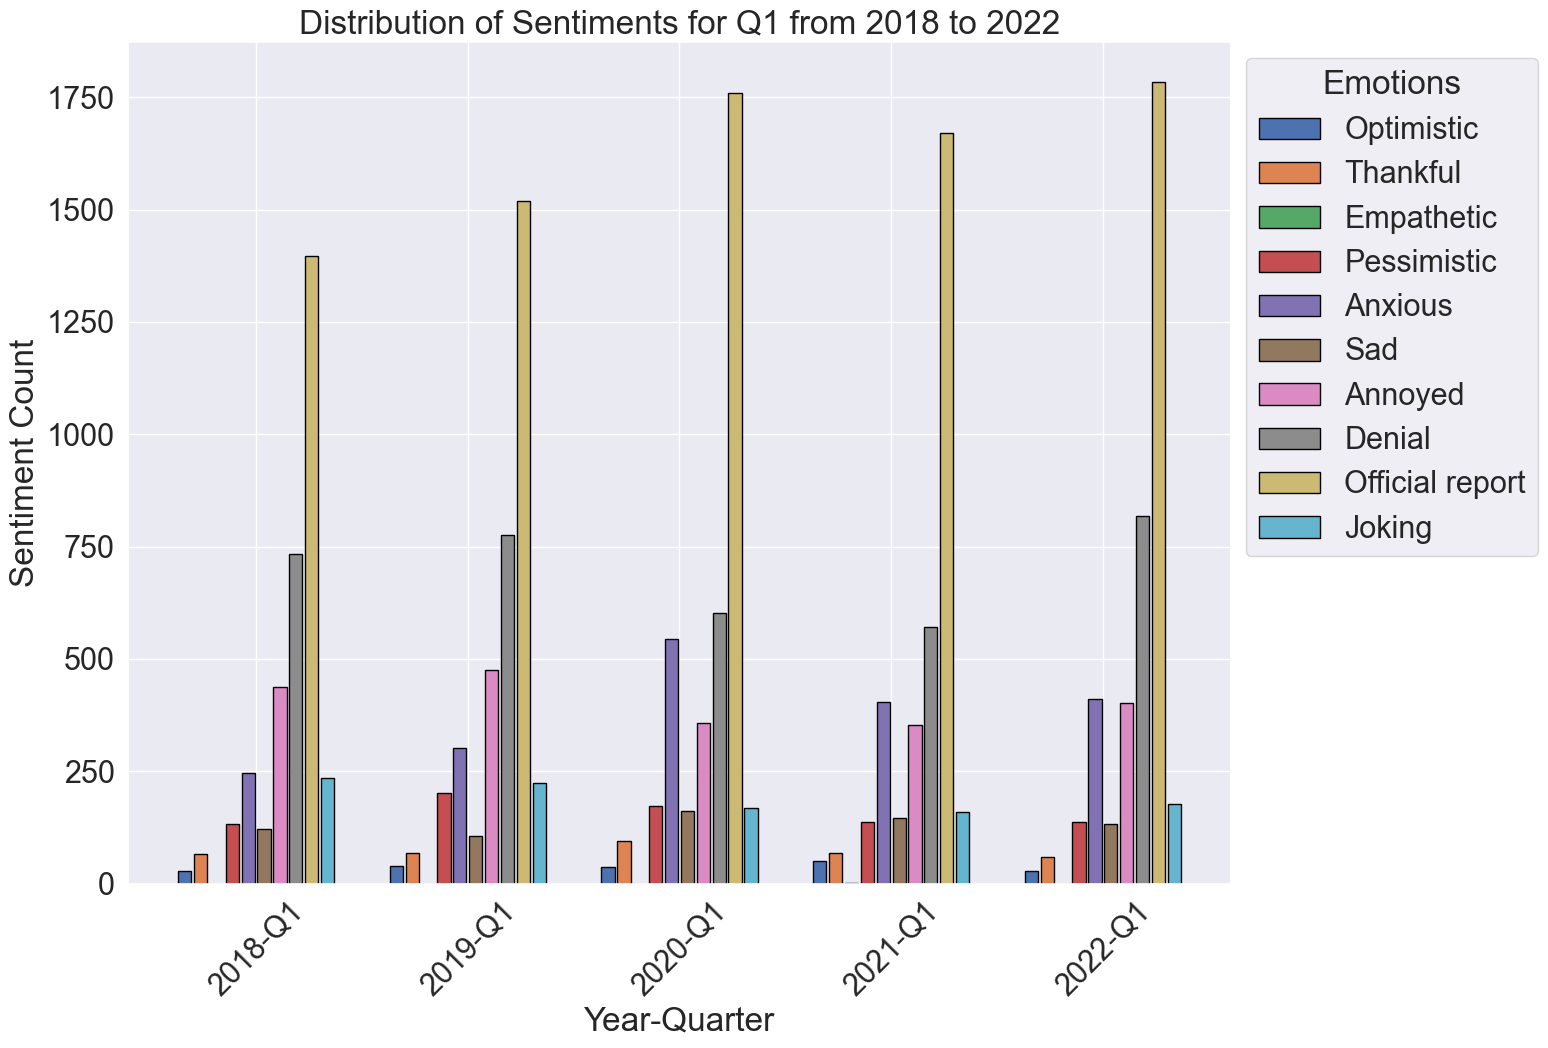

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 确保在Jupyter Notebook中能够显示图形
%matplotlib inline
def plot_first_quarter_sentiment(bert_data, start_year, end_year):
    # 提取情感标签列
    emotions = bert_data.columns[1:11]  # 第二列开始为情感标签
    # 仅选取指定年份的第一季度
    quarters = [f"{year}-Q1" for year in range(start_year, end_year + 1)]

    # 根据年份季度对数据进行分组，并计算每个季度内各情感类别的统计值
    quarterly_stats = {}
    for quarter in quarters:
        quarter_data = bert_data[bert_data['year_quarter'] == quarter]
        quarterly_stats[quarter] = quarter_data[emotions].sum()

    # 创建图表来可视化统计值
    x = np.arange(len(quarters))*0.8  # 使用数字索引而不是字符串标签
    width = 0.05  # 调整柱状图的宽度，因为季度更少了
    gap = 0.01  # 柱子间的间距

    plt.figure(figsize=(16, 11))  # 调整图表大小

    for i, emotion in enumerate(emotions):
        y_values = [quarterly_stats[quarter][emotion] for quarter in quarters]
        plt.bar(x + i * (width + gap), y_values, width, label=emotion, edgecolor='black')  # 添加边框颜色

    plt.xlabel('Year-Quarter')
    plt.ylabel('Sentiment Count')
    plt.title(f'Distribution of Sentiments for Q1 from {start_year} to {end_year}')
    plt.xticks(x + (len(emotions) - 1) * (width + gap) / 2, quarters, rotation=45)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Emotions")
    plt.tight_layout()

    plt.show()
plot_first_quarter_sentiment(bert_data, 2018, 2022)

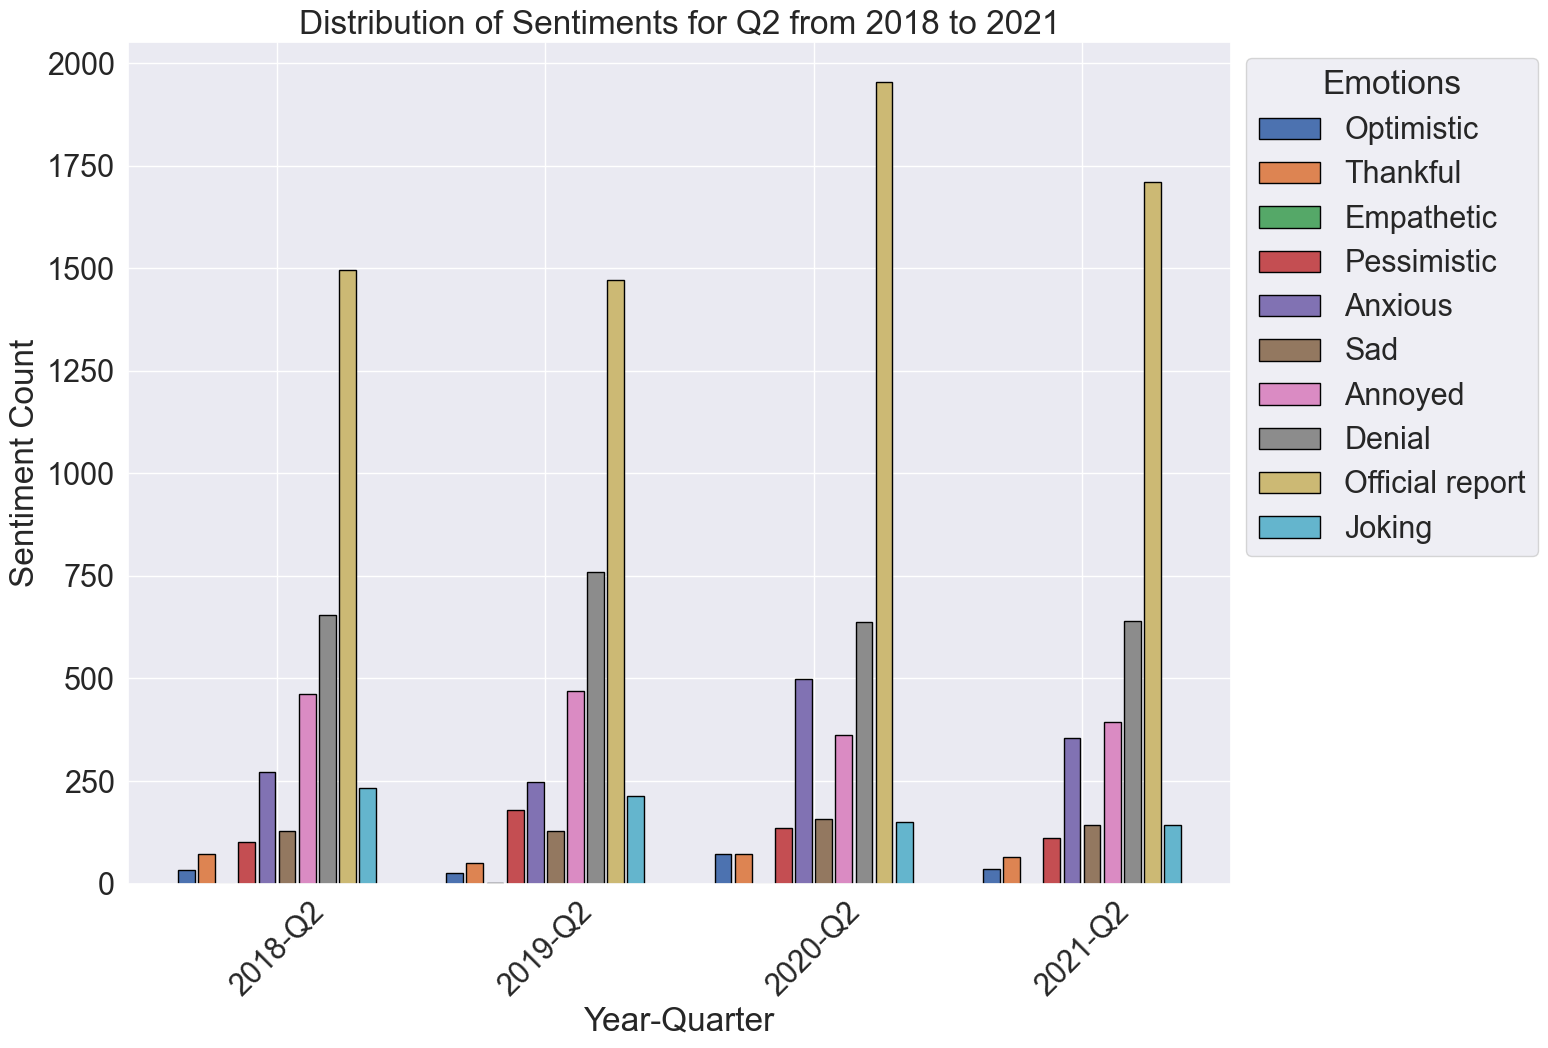

In [116]:
def plot_second_quarter_sentiment(bert_data, start_year, end_year):
    # 提取情感标签列
    emotions = bert_data.columns[1:11]  # 第二列开始为情感标签
    # 仅选取指定年份的第二季度
    quarters = [f"{year}-Q2" for year in range(start_year, end_year + 1)]

    # 根据年份季度对数据进行分组，并计算每个季度内各情感类别的统计值
    quarterly_stats = {}
    for quarter in quarters:
        quarter_data = bert_data[bert_data['year_quarter'] == quarter]
        quarterly_stats[quarter] = quarter_data[emotions].sum()

    # 创建图表来可视化统计值
    x = np.arange(len(quarters))*0.8  # 使用数字索引而不是字符串标签
    width = 0.05  # 调整柱状图的宽度
    gap = 0.01  # 柱子间的间距

    plt.figure(figsize=(16, 11))  # 调整图表大小

    for i, emotion in enumerate(emotions):
        y_values = [quarterly_stats[quarter][emotion] for quarter in quarters]
        plt.bar(x + i * (width + gap), y_values, width, label=emotion, edgecolor='black')  # 添加边框颜色

    plt.xlabel('Year-Quarter')
    plt.ylabel('Sentiment Count')
    plt.title(f'Distribution of Sentiments for Q2 from {start_year} to {end_year}')
    plt.xticks(x + (len(emotions) - 1) * (width + gap) / 2, quarters, rotation=45)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Emotions")
    plt.tight_layout()

    plt.show()

# 调用函数，生成2018至2021年每年第二季度的情感分析图
plot_second_quarter_sentiment(bert_data, 2018, 2021)

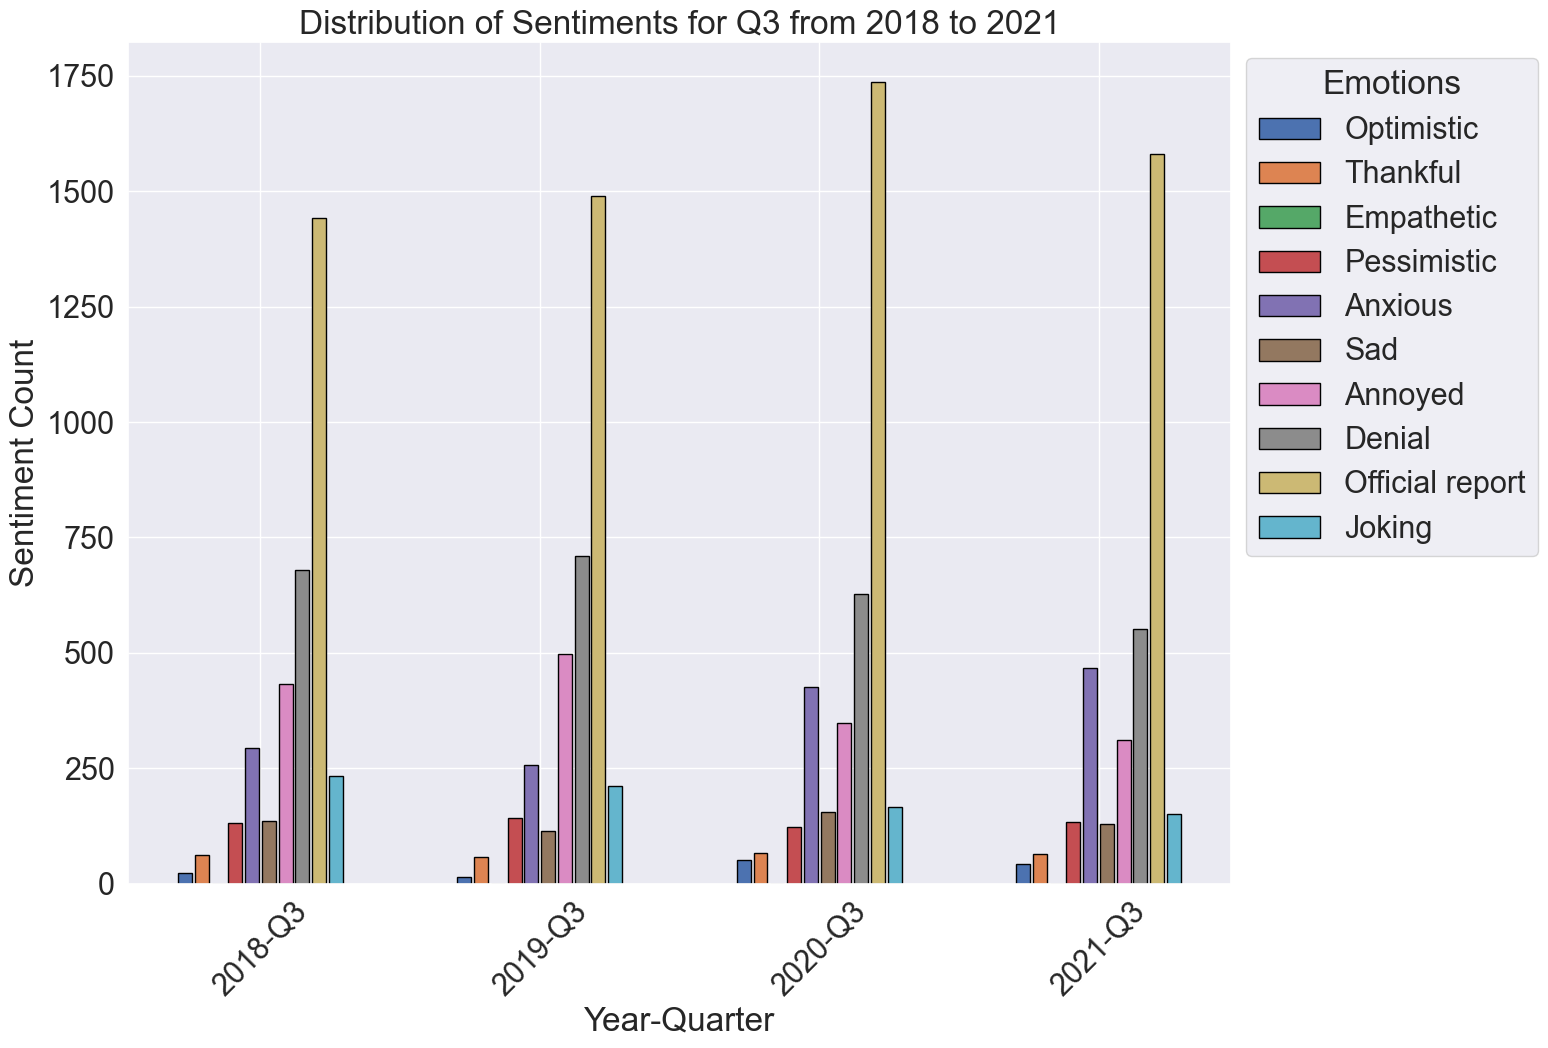

In [120]:
def plot_third_quarter_sentiment(bert_data, start_year, end_year):
    # 提取情感标签列
    emotions = bert_data.columns[1:11]  # 第二列开始为情感标签
    # 仅选取指定年份的第三季度
    quarters = [f"{year}-Q3" for year in range(start_year, end_year + 1)]

    # 根据年份季度对数据进行分组，并计算每个季度内各情感类别的统计值
    quarterly_stats = {}
    for quarter in quarters:
        quarter_data = bert_data[bert_data['year_quarter'] == quarter]
        quarterly_stats[quarter] = quarter_data[emotions].sum()

    # 创建图表来可视化统计值
    x = np.arange(len(quarters))  # 使用数字索引而不是字符串标签
    width = 0.05  # 调整柱状图的宽度
    gap = 0.01  # 柱子间的间距

    plt.figure(figsize=(16, 11))  # 调整图表大小

    for i, emotion in enumerate(emotions):
        y_values = [quarterly_stats[quarter][emotion] for quarter in quarters]
        plt.bar(x + i * (width + gap), y_values, width, label=emotion, edgecolor='black')  # 添加边框颜色

    plt.xlabel('Year-Quarter')
    plt.ylabel('Sentiment Count')
    plt.title(f'Distribution of Sentiments for Q3 from {start_year} to {end_year}')
    plt.xticks(x + (len(emotions) - 1) * (width + gap) / 2, quarters, rotation=45)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Emotions")
    plt.tight_layout()

    plt.show()

# 调用函数，生成2018至2021年每年第三季度的情感分析图
plot_third_quarter_sentiment(bert_data, 2018, 2021)


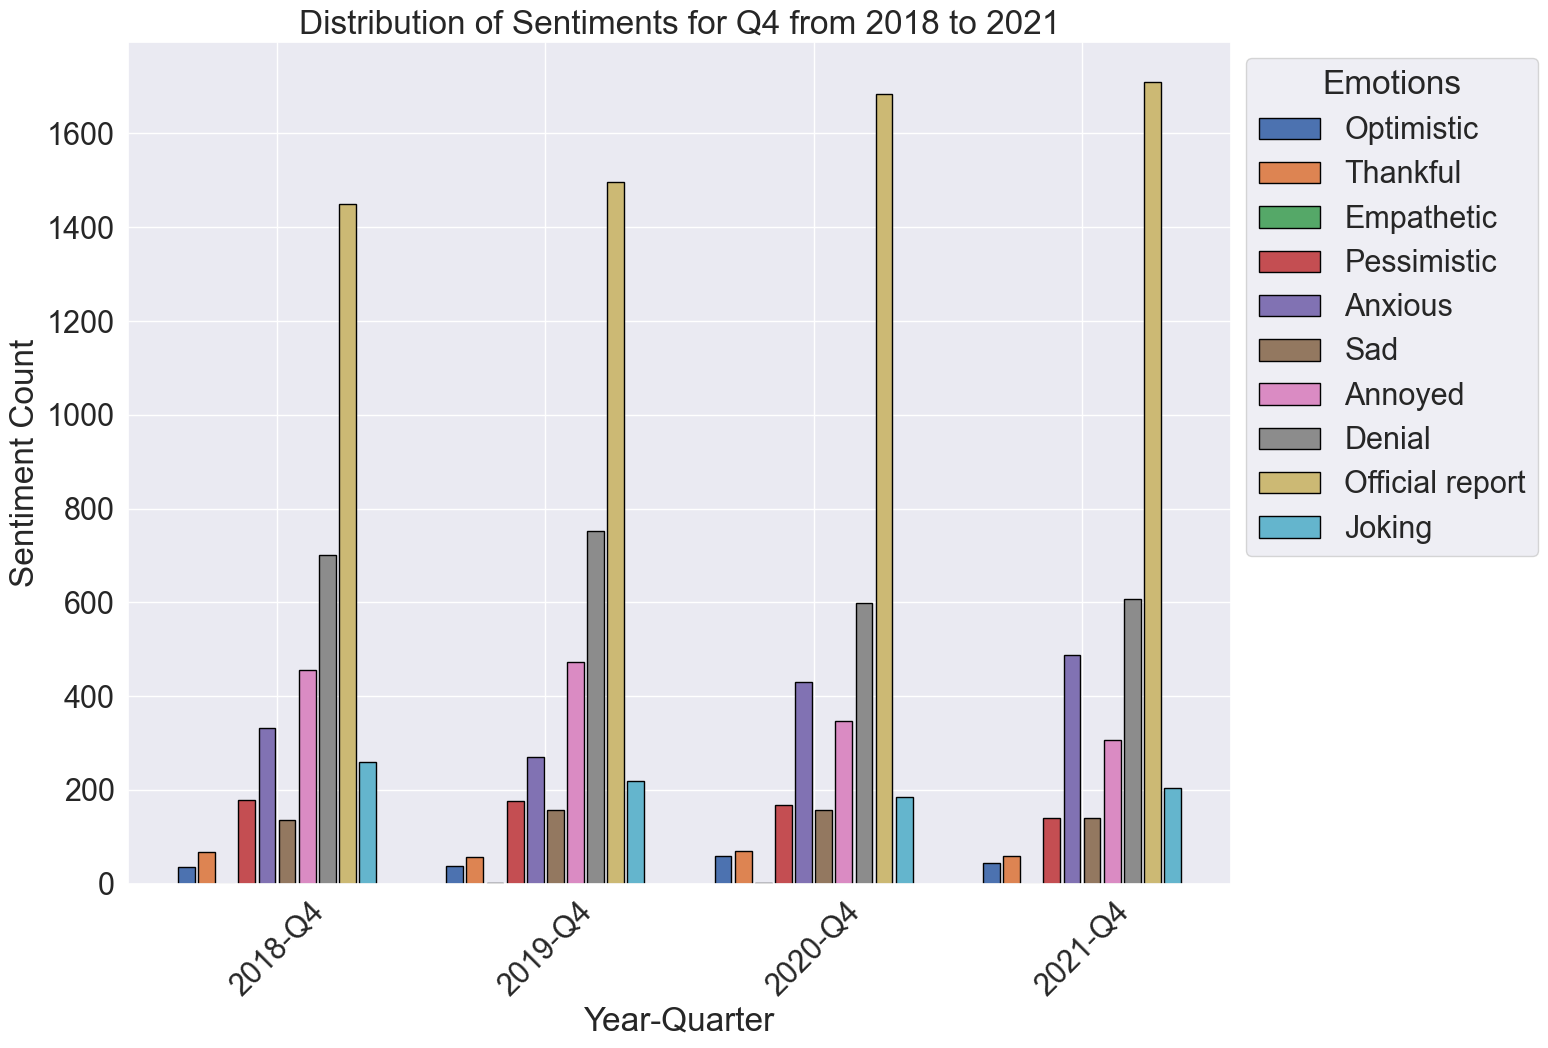

In [121]:
def plot_fourth_quarter_sentiment(bert_data, start_year, end_year):
    # 提取情感标签列
    emotions = bert_data.columns[1:11]  # 第二列开始为情感标签
    # 仅选取指定年份的第四季度
    quarters = [f"{year}-Q4" for year in range(start_year, end_year + 1)]

    # 根据年份季度对数据进行分组，并计算每个季度内各情感类别的统计值
    quarterly_stats = {}
    for quarter in quarters:
        quarter_data = bert_data[bert_data['year_quarter'] == quarter]
        quarterly_stats[quarter] = quarter_data[emotions].sum()

    # 创建图表来可视化统计值
    x = np.arange(len(quarters))*0.8  # 使用数字索引而不是字符串标签
    width = 0.05  # 调整柱状图的宽度
    gap = 0.01  # 柱子间的间距

    plt.figure(figsize=(16, 11))  # 调整图表大小

    for i, emotion in enumerate(emotions):
        y_values = [quarterly_stats[quarter][emotion] for quarter in quarters]
        plt.bar(x + i * (width + gap), y_values, width, label=emotion, edgecolor='black')  # 添加边框颜色

    plt.xlabel('Year-Quarter')
    plt.ylabel('Sentiment Count')
    plt.title(f'Distribution of Sentiments for Q4 from {start_year} to {end_year}')
    plt.xticks(x + (len(emotions) - 1) * (width + gap) / 2, quarters, rotation=45)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Emotions")
    plt.tight_layout()

    plt.show()

# 调用函数，生成2018至2021年每年第四季度的情感分析图
plot_fourth_quarter_sentiment(bert_data, 2018, 2021)
